In [30]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read preprocessed csv files
df1988nc = pd.read_csv("df1988nc.csv")
df1988c = pd.read_csv("df1988c.csv")
df1998nc = pd.read_csv("df1998nc.csv")
df1998c = pd.read_csv("df1998c.csv")

In [3]:
#look at size and properties of csv files
print(len(df1988nc.index))
print(df1988nc.dtypes)
print(len(df1998nc.index))
print(df1998nc.dtypes)
print(len(df1988c.index))
print(df1988c.dtypes)
print(len(df1998c.index))
print(df1998c.dtypes)

5151933
Month                   int64
DayofMonth              int64
DayOfWeek               int64
DepTime               float64
CRSDepTime              int64
ArrTime               float64
CRSArrTime              int64
UniqueCarrier          object
ActualElapsedTime     float64
CRSElapsedTime          int64
AirTime               float64
ArrDelay              float64
DepDelay              float64
Origin                 object
Dest                   object
Distance              float64
Diverted                int64
DepTimeInterval        object
ArrTimeInterval        object
Weekend                 int64
Holiday                 int64
DistInterval           object
OriginSizeInterval     object
DestSizeInterval       object
dtype: object
5240212
Month                   int64
DayofMonth              int64
DayOfWeek               int64
DepTime               float64
CRSDepTime              int64
ArrTime               float64
CRSArrTime              int64
UniqueCarrier          object
ActualElap

To characterize flights that are on time vs late, and airlines that are successful, 'late' and 'successful' need to be defined
Additionally, number of late flights needs to be calculated, along with mean and median to help understand data

In [4]:
print("Number of late flights 1998(15 minutes)")
print(len(df1998nc[df1998nc['DepDelay']>=15]))
print("Number of late flights 1998 (5 minutes)")
print(len(df1998nc[df1998nc['DepDelay']>=5]))
print("Number of early flights 1998")
print(len(df1998nc[df1998nc['DepDelay']>=0]))
print("Number of flights total 1998")
print(len(df1998nc['DepDelay']))
print("Earliest departure (minutes)")
print(df1998nc['DepDelay'].min())
print("Median delay")
print(df1998nc['DepDelay'].median())

Number of late flights 1998(15 minutes)
870395
Number of late flights 1998 (5 minutes)
1553736
Number of early flights 1998
3332053
Number of flights total 1998
5240212
Earliest departure (minutes)
-111.0
Median delay
0.0


In [5]:
#calculate percentage of flights on-time (departure) based on 'col' feature and 'threshold' value
def get_percentage(df, col, value, threshold):
    x = len(df[(df[col]==value) & (df['DepDelay'].apply(np.absolute)<threshold)])
    return (x/len(df[df[col]==value]))

#same as above, but using arrival instead of departure
def get_percentage_arr(df, col, value, threshold):
    x = len(df[(df[col]==value) & (df['ArrDelay'].apply(np.absolute)<threshold)])
    return (x/len(df[df[col]==value]))

In [6]:
#some more data exploration
print("Percentage of 1988 weekend flights on-time (5 mins) (departure): ", get_percentage(df1988nc, 'Weekend', 1, 5))
print("Percentage of 1988 weekday flights on-time (5 mins) (departure): ", get_percentage(df1988nc, 'Weekend', 0, 5))
print("Percentage of 1988 holiday flights on-time (5 mins) (departure): ", get_percentage(df1988nc, 'Holiday', 1, 5))
print("Percentage of 1988 non-holiday flights on-time (5 mins) (departure): ", get_percentage(df1988nc, 'Holiday', 0, 5))
print("Percentage of 1998 weekend flights on-time (5 mins) (departure): ", get_percentage(df1998nc, 'Weekend', 1, 5))
print("Percentage of 1998 weekday flights on-time (5 mins) (departure): ", get_percentage(df1998nc, 'Weekend', 0, 5))
print("Percentage of 1998 holiday flights on-time (5 mins) (departure): ", get_percentage(df1998nc, 'Holiday', 1, 5))
print("Percentage of 1998 non-holiday flights on-time (5 mins) (departure): ", get_percentage(df1998nc, 'Holiday', 0, 5))
print("Percentage of 1988 weekend flights on-time (5 mins) (arrival): ", get_percentage_arr(df1988nc, 'Weekend', 1, 5))
print("Percentage of 1988 weekday flights on-time (5 mins) (arrival): ", get_percentage_arr(df1988nc, 'Weekend', 0, 5))
print("Percentage of 1988 holiday flights on-time (5 mins) (arrival): ", get_percentage_arr(df1988nc, 'Holiday', 1, 5))
print("Percentage of 1988 non-holiday flights on-time (5 mins) (arrival): ", get_percentage_arr(df1988nc, 'Holiday', 0, 5))
print("Percentage of 1998 weekend flights on-time (5 mins) (arrival): ", get_percentage_arr(df1998nc, 'Weekend', 1, 5))
print("Percentage of 1998 weekday flights on-time (5 mins) (arrival): ", get_percentage_arr(df1998nc, 'Weekend', 0, 5))
print("Percentage of 1998 holiday flights on-time (5 mins) (arrival): ", get_percentage_arr(df1998nc, 'Holiday', 1, 5))
print("Percentage of 1998 non-holiday flights on-time (5 mins) (arrival): ", get_percentage_arr(df1998nc, 'Holiday', 0, 5))

Percentage of 1988 weekend flights on-time (5 mins) (departure):  0.7349901680142242
Percentage of 1988 weekday flights on-time (5 mins) (departure):  0.707943851097954
Percentage of 1988 holiday flights on-time (5 mins) (departure):  0.7370865412525744
Percentage of 1988 non-holiday flights on-time (5 mins) (departure):  0.7146720977368965
Percentage of 1998 weekend flights on-time (5 mins) (departure):  0.642222692260737
Percentage of 1998 weekday flights on-time (5 mins) (departure):  0.6430064750124238
Percentage of 1998 holiday flights on-time (5 mins) (departure):  0.6623838248018874
Percentage of 1998 non-holiday flights on-time (5 mins) (departure):  0.6421762782723187
Percentage of 1988 weekend flights on-time (5 mins) (arrival):  0.34184986885928986
Percentage of 1988 weekday flights on-time (5 mins) (arrival):  0.333709739133449
Percentage of 1988 holiday flights on-time (5 mins) (arrival):  0.3302071958754337
Percentage of 1988 non-holiday flights on-time (5 mins) (arrival)

In [7]:
print("Percentage of 1988 weekend flights on-time (10 mins) (departure): ", get_percentage(df1988nc, 'Weekend', 1, 10))
print("Percentage of 1988 weekday flights on-time (10 mins) (departure): ", get_percentage(df1988nc, 'Weekend', 0, 10))
print("Percentage of 1988 holiday flights on-time (10 mins) (departure): ", get_percentage(df1988nc, 'Holiday', 1, 10))
print("Percentage of 1988 non-holiday flights on-time (10 mins) (departure): ", get_percentage(df1988nc, 'Holiday', 0, 10))
print("Percentage of 1998 weekend flights on-time (10 mins) (departure): ", get_percentage(df1998nc, 'Weekend', 1, 10))
print("Percentage of 1998 weekday flights on-time (10 mins) (departure): ", get_percentage(df1998nc, 'Weekend', 0, 10))
print("Percentage of 1998 holiday flights on-time (10 mins) (departure): ", get_percentage(df1998nc, 'Holiday', 1, 10))
print("Percentage of 1998 non-holiday flights on-time (10 mins) (departure): ", get_percentage(df1998nc, 'Holiday', 0, 10))
print("Percentage of 1988 weekend flights on-time (10 mins) (arrival): ", get_percentage_arr(df1988nc, 'Weekend', 1, 10))
print("Percentage of 1988 weekday flights on-time (10 mins) (arrival): ", get_percentage_arr(df1988nc, 'Weekend', 0, 10))
print("Percentage of 1988 holiday flights on-time (10 mins) (arrival): ", get_percentage_arr(df1988nc, 'Holiday', 1, 10))
print("Percentage of 1988 non-holiday flights on-time (10 mins) (arrival): ", get_percentage_arr(df1988nc, 'Holiday', 0, 10))
print("Percentage of 1998 weekend flights on-time (10 mins) (arrival): ", get_percentage_arr(df1998nc, 'Weekend', 1, 10))
print("Percentage of 1998 weekday flights on-time (10 mins) (arrival): ", get_percentage_arr(df1998nc, 'Weekend', 0, 10))
print("Percentage of 1998 holiday flights on-time (10 mins) (arrival): ", get_percentage_arr(df1998nc, 'Holiday', 1, 10))
print("Percentage of 1998 non-holiday flights on-time (10 mins) (arrival): ", get_percentage_arr(df1998nc, 'Holiday', 0, 10))

Percentage of 1988 weekend flights on-time (10 mins) (departure):  0.8300743178257184
Percentage of 1988 weekday flights on-time (10 mins) (departure):  0.80455019951285
Percentage of 1988 holiday flights on-time (10 mins) (departure):  0.8258946466335854
Percentage of 1988 non-holiday flights on-time (10 mins) (departure):  0.8110777216745596
Percentage of 1998 weekend flights on-time (10 mins) (departure):  0.792514983660641
Percentage of 1998 weekday flights on-time (10 mins) (departure):  0.7805535081162119
Percentage of 1998 holiday flights on-time (10 mins) (departure):  0.8106336489439184
Percentage of 1998 non-holiday flights on-time (10 mins) (departure):  0.7829198568146798
Percentage of 1988 weekend flights on-time (10 mins) (arrival):  0.6209441274933145
Percentage of 1988 weekday flights on-time (10 mins) (arrival):  0.6006036713564074
Percentage of 1988 holiday flights on-time (10 mins) (arrival):  0.6030312245151838
Percentage of 1988 non-holiday flights on-time (10 mins

In [8]:
print("Percentage of 1988 weekend flights on-time (15 mins) (departure): ", get_percentage(df1988nc, 'Weekend', 1, 15))
print("Percentage of 1988 weekday flights on-time (15 mins) (departure): ", get_percentage(df1988nc, 'Weekend', 0, 15))
print("Percentage of 1988 holiday flights on-time (15 mins) (departure): ", get_percentage(df1988nc, 'Holiday', 1, 15))
print("Percentage of 1988 non-holiday flights on-time (15 mins) (departure): ", get_percentage(df1988nc, 'Holiday', 0, 15))
print("Percentage of 1998 weekend flights on-time (15 mins) (departure): ", get_percentage(df1998nc, 'Weekend', 1, 15))
print("Percentage of 1998 weekday flights on-time (15 mins) (departure): ", get_percentage(df1998nc, 'Weekend', 0, 15))
print("Percentage of 1998 holiday flights on-time (15 mins) (departure): ", get_percentage(df1998nc, 'Holiday', 1, 15))
print("Percentage of 1998 non-holiday flights on-time (15 mins) (departure): ", get_percentage(df1998nc, 'Holiday', 0, 15))
print("Percentage of 1988 weekend flights on-time (15 mins) (arrival): ", get_percentage_arr(df1988nc, 'Weekend', 1, 15))
print("Percentage of 1988 weekday flights on-time (15 mins) (arrival): ", get_percentage_arr(df1988nc, 'Weekend', 0, 15))
print("Percentage of 1988 holiday flights on-time (15 mins) (arrival): ", get_percentage_arr(df1988nc, 'Holiday', 1, 15))
print("Percentage of 1988 non-holiday flights on-time (15 mins) (arrival): ", get_percentage_arr(df1988nc, 'Holiday', 0, 15))
print("Percentage of 1998 weekend flights on-time (15 mins) (arrival): ", get_percentage_arr(df1998nc, 'Weekend', 1, 15))
print("Percentage of 1998 weekday flights on-time (15 mins) (arrival): ", get_percentage_arr(df1998nc, 'Weekend', 0, 15))
print("Percentage of 1998 holiday flights on-time (15 mins) (arrival): ", get_percentage_arr(df1998nc, 'Holiday', 1, 15))
print("Percentage of 1998 non-holiday flights on-time (15 mins) (arrival): ", get_percentage_arr(df1998nc, 'Holiday', 0, 15))

Percentage of 1988 weekend flights on-time (15 mins) (departure):  0.8838634138823643
Percentage of 1988 weekday flights on-time (15 mins) (departure):  0.861125457786334
Percentage of 1988 holiday flights on-time (15 mins) (departure):  0.8737957344464871
Percentage of 1988 non-holiday flights on-time (15 mins) (departure):  0.8671237781939308
Percentage of 1998 weekend flights on-time (15 mins) (departure):  0.8433458634875659
Percentage of 1998 weekday flights on-time (15 mins) (departure):  0.8295089138432884
Percentage of 1998 holiday flights on-time (15 mins) (departure):  0.8576079581177906
Percentage of 1998 non-holiday flights on-time (15 mins) (departure):  0.832458095378527
Percentage of 1988 weekend flights on-time (15 mins) (arrival):  0.7804520430267105
Percentage of 1988 weekday flights on-time (15 mins) (arrival):  0.7536802221638579
Percentage of 1988 holiday flights on-time (15 mins) (arrival):  0.7629203698840311
Percentage of 1988 non-holiday flights on-time (15 min

In [9]:
#function to get percentage of flights on-time based on feature
#iterates through by value of feature (ie: airport, flight length interval)
def get_metrics(df, col):
    indices = df[col].unique()
    metrics_df = []
    for i in indices:
        x = np.around(get_percentage(df, col, i, 15), decimals=4)
        n_flights = len(df[df[col]==i][col])
        print("Percentage of ", col, " flights on-time (15 mins) (departure): ", i, ":", x, "(" + str(n_flights) + " flights)")
        metrics_df.append([col, i, x, n_flights])
    return pd.DataFrame(metrics_df)

#same as above, but for arrival times instead of departure
def get_metrics_arr(df, col):
    indices = df[col].unique()
    metrics_df = []
    for i in indices:
        x = np.around(get_percentage_arr(df, col, i, 15), decimals=4)
        n_flights = len(df[df[col]==i][col])
        print("Percentage of ", col, " flights on-time (15 mins) (arrival): ", i, ":", x, "(" + str(n_flights) + " flights)")
        metrics_df.append([col, i, x, n_flights])
    return pd.DataFrame(metrics_df)

The next step is to explore the data further by analyzing which feature seems to correlate most with whether a flight departs on time

In [10]:
'''
print("1988, not cancelled, by airport (origin) (departure)")
metrics_1988nc_origin = get_metrics(df1988nc, 'Origin')
print("")
print("1988, not cancelled, by airport (destination) (departure)")
metrics_1988nc_dest = get_metrics(df1988nc, 'Dest')
print("")
'''

'\nprint("1988, not cancelled, by airport (origin) (departure)")\nmetrics_1988nc_origin = get_metrics(df1988nc, \'Origin\')\nprint("")\nprint("1988, not cancelled, by airport (destination) (departure)")\nmetrics_1988nc_dest = get_metrics(df1988nc, \'Dest\')\nprint("")\n'

In [11]:
print("1988, not cancelled, by airline (departure)")
metrics_1988nc_airline = get_metrics(df1988nc, 'UniqueCarrier')
print("")
print("1988, not cancelled, by day of week (departure)")
metrics_1988nc_day = get_metrics(df1988nc, 'DayOfWeek')
print("")
print("1988, not cancelled, by distance (departure)")
metrics_1988nc_dist = get_metrics(df1988nc, 'DistInterval')
print("")
print("1988, not cancelled, by departure time (departure)")
metrics_1988nc_deptime = get_metrics(df1988nc, 'DepTimeInterval')
print("")

1988, not cancelled, by airline (departure)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  PI : 0.8536 (466643 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  PS : 0.9073 (41639 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  TW : 0.8533 (273353 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  UA : 0.8449 (581378 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  WN : 0.874 (260957 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  EA : 0.8467 (382686 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  HP : 0.9129 (179898 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  NW : 0.8699 (425266 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  PA (1) : 0.8701 (71401 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departu

In [12]:
print("1988, not cancelled, by origin size (departure)")
metrics_1988nc_OSI = get_metrics(df1988nc, 'OriginSizeInterval')
print("")
print("1988, not cancelled, by destination size (departure)")
metrics_1988nc_DSI = get_metrics(df1988nc, 'DestSizeInterval')
print("")

1988, not cancelled, by origin size (departure)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (departure):  Very large : 0.8577 (3973906 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (departure):  Very small : 0.895 (38025 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (departure):  Small : 0.8977 (104813 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (departure):  Medium : 0.9018 (241952 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (departure):  Large : 0.8997 (793237 flights)

1988, not cancelled, by destination size (departure)
Percentage of  DestSizeInterval  flights on-time (15 mins) (departure):  Very large : 0.8685 (3990564 flights)
Percentage of  DestSizeInterval  flights on-time (15 mins) (departure):  Large : 0.8645 (782734 flights)
Percentage of  DestSizeInterval  flights on-time (15 mins) (departure):  Very small : 0.8661 (37300 flights)
Percentage of  DestSizeInter

In [13]:
'''
print("1998, not cancelled, by airport (origin) (departure)")
metrics_1998nc_origin = get_metrics(df1998nc, 'Origin')
print("")
print("1998, not cancelled, by airport (destination) (departure)")
metrics_1998nc_dest = get_metrics(df1998nc, 'Dest')
print("")
'''

'\nprint("1998, not cancelled, by airport (origin) (departure)")\nmetrics_1998nc_origin = get_metrics(df1998nc, \'Origin\')\nprint("")\nprint("1998, not cancelled, by airport (destination) (departure)")\nmetrics_1998nc_dest = get_metrics(df1998nc, \'Dest\')\nprint("")\n'

In [14]:
print("1998, not cancelled, by airline (departure)")
metrics_1998nc_airline = get_metrics(df1998nc, 'UniqueCarrier')
print("")
print("1998, not cancelled, by day of week (departure)")
metrics_1998nc_day = get_metrics(df1998nc, 'DayOfWeek')
print("")
print("1998, not cancelled, by distance (departure)")
metrics_1998nc_dist = get_metrics(df1998nc, 'DistInterval')
print("")
print("1998, not cancelled, by departure time (departure)")
metrics_1998nc_deptime = get_metrics(df1998nc, 'DepTimeInterval')
print("")

1998, not cancelled, by airline (departure)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  WN : 0.8044 (806129 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  HP : 0.7632 (198592 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  CO : 0.8512 (392011 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  US : 0.8444 (678816 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  DL : 0.8714 (898170 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  UA : 0.8066 (727775 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  AA : 0.8659 (639257 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  NW : 0.8113 (483242 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departure):  AS : 0.8124 (148710 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (departur

In [15]:
print("1998, not cancelled, by origin size (departure)")
metrics_1998nc_OSI = get_metrics(df1998nc, 'OriginSizeInterval')
print("")
print("1998, not cancelled, by destination size (departure)")
metrics_1998nc_DSI = get_metrics(df1998nc, 'DestSizeInterval')
print("")

1998, not cancelled, by origin size (departure)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (departure):  Large : 0.8632 (817491 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (departure):  Very large : 0.8241 (4127434 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (departure):  Medium : 0.8791 (199732 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (departure):  Small : 0.8769 (69754 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (departure):  Very small : 0.8662 (25801 flights)

1998, not cancelled, by destination size (departure)
Percentage of  DestSizeInterval  flights on-time (15 mins) (departure):  Very large : 0.8375 (4126013 flights)
Percentage of  DestSizeInterval  flights on-time (15 mins) (departure):  Medium : 0.823 (200075 flights)
Percentage of  DestSizeInterval  flights on-time (15 mins) (departure):  Small : 0.8178 (69896 flights)
Percentage of  DestSizeInterval  

In [16]:
'''
print("1988, not cancelled, by airport (origin) (arrival)")
metrics_1988nc_origin_arr = get_metrics_arr(df1988nc, 'Origin')
print("")
print("1988, not cancelled, by airport (destination) (arrival)")
metrics_1988nc_dest_arr = get_metrics_arr(df1988nc, 'Dest')
print("")
'''

'\nprint("1988, not cancelled, by airport (origin) (arrival)")\nmetrics_1988nc_origin_arr = get_metrics_arr(df1988nc, \'Origin\')\nprint("")\nprint("1988, not cancelled, by airport (destination) (arrival)")\nmetrics_1988nc_dest_arr = get_metrics_arr(df1988nc, \'Dest\')\nprint("")\n'

In [17]:
print("1988, not cancelled, by airline (arrival)")
metrics_1988nc_airline_arr = get_metrics_arr(df1988nc, 'UniqueCarrier')
print("")
print("1988, not cancelled, by day of week (arrival)")
metrics_1988nc_day_arr = get_metrics_arr(df1988nc, 'DayOfWeek')
print("")
print("1988, not cancelled, by distance (arrival)")
metrics_1988nc_dist_arr = get_metrics_arr(df1988nc, 'DistInterval')
print("")
print("1988, not cancelled, by departure time (arrival)")
metrics_1988nc_deptime_arr = get_metrics_arr(df1988nc, 'DepTimeInterval')
print("")

1988, not cancelled, by airline (arrival)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  PI : 0.7734 (466643 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  PS : 0.8241 (41639 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  TW : 0.7296 (273353 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  UA : 0.728 (581378 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  WN : 0.8505 (260957 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  EA : 0.7427 (382686 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  HP : 0.8633 (179898 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  NW : 0.739 (425266 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  PA (1) : 0.7201 (71401 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  CO : 0.6709 (4521

In [18]:
print("1988, not cancelled, by origin size (arrival)")
metrics_1988nc_OSI_arr = get_metrics_arr(df1988nc, 'OriginSizeInterval')
print("")
print("1988, not cancelled, by destination size (arrival)")
metrics_1988nc_DSI_arr = get_metrics_arr(df1988nc, 'DestSizeInterval')
print("")

1988, not cancelled, by origin size (arrival)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (arrival):  Very large : 0.7426 (3973906 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (arrival):  Very small : 0.8366 (38025 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (arrival):  Small : 0.8317 (104813 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (arrival):  Medium : 0.8311 (241952 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (arrival):  Large : 0.8188 (793237 flights)

1988, not cancelled, by destination size (arrival)
Percentage of  DestSizeInterval  flights on-time (15 mins) (arrival):  Very large : 0.7541 (3990564 flights)
Percentage of  DestSizeInterval  flights on-time (15 mins) (arrival):  Large : 0.7824 (782734 flights)
Percentage of  DestSizeInterval  flights on-time (15 mins) (arrival):  Very small : 0.794 (37300 flights)
Percentage of  DestSizeInterval  flights on-time

In [19]:
'''
print("1998, not cancelled, by airport (origin) (arrival)")
metrics_1998nc_origin_arr = get_metrics_arr(df1998nc, 'Origin')
print("")
print("1998, not cancelled, by airport (destination) (arrival)")
metrics_1998nc_dest_arr = get_metrics_arr(df1998nc, 'Dest')
print("")
'''

'\nprint("1998, not cancelled, by airport (origin) (arrival)")\nmetrics_1998nc_origin_arr = get_metrics_arr(df1998nc, \'Origin\')\nprint("")\nprint("1998, not cancelled, by airport (destination) (arrival)")\nmetrics_1998nc_dest_arr = get_metrics_arr(df1998nc, \'Dest\')\nprint("")\n'

In [20]:
print("1998, not cancelled, by airline (arrival)")
metrics_1998nc_airline_arr = get_metrics_arr(df1998nc, 'UniqueCarrier')
print("")
print("1998, not cancelled, by day of week (arrival)")
metrics_1998nc_day_arr = get_metrics_arr(df1998nc, 'DayOfWeek')
print("")
print("1998, not cancelled, by distance (arrival)")
metrics_1998nc_dist_arr = get_metrics_arr(df1998nc, 'DistInterval')
print("")
print("1998, not cancelled, by departure time (arrival)")
metrics_1998nc_deptime_arr = get_metrics_arr(df1998nc, 'DepTimeInterval')
print("")

1998, not cancelled, by airline (arrival)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  WN : 0.7927 (806129 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  HP : 0.6684 (198592 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  CO : 0.6593 (392011 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  US : 0.7419 (678816 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  DL : 0.7274 (898170 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  UA : 0.6995 (727775 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  AA : 0.6502 (639257 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  NW : 0.6317 (483242 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  AS : 0.7224 (148710 flights)
Percentage of  UniqueCarrier  flights on-time (15 mins) (arrival):  TW : 0.7032 (2675

In [21]:
print("1998, not cancelled, by origin size (arrival)")
metrics_1998nc_OSI_arr = get_metrics_arr(df1998nc, 'OriginSizeInterval')
print("")
print("1998, not cancelled, by destination size (arrival)")
metrics_1998nc_DSI_arr = get_metrics_arr(df1998nc, 'DestSizeInterval')
print("")

1998, not cancelled, by origin size (arrival)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (arrival):  Large : 0.7674 (817491 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (arrival):  Very large : 0.6911 (4127434 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (arrival):  Medium : 0.7946 (199732 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (arrival):  Small : 0.7793 (69754 flights)
Percentage of  OriginSizeInterval  flights on-time (15 mins) (arrival):  Very small : 0.7708 (25801 flights)

1998, not cancelled, by destination size (arrival)
Percentage of  DestSizeInterval  flights on-time (15 mins) (arrival):  Very large : 0.7007 (4126013 flights)
Percentage of  DestSizeInterval  flights on-time (15 mins) (arrival):  Medium : 0.7497 (200075 flights)
Percentage of  DestSizeInterval  flights on-time (15 mins) (arrival):  Small : 0.738 (69896 flights)
Percentage of  DestSizeInterval  flights on-time (15 

In [22]:
#below is exporting all the metrics to csv in case something goes wrong or data needs to be quickly imported again
#metrics_1988nc_origin

In [23]:
#metrics_1988nc_origin.to_csv(r'metrics_1988nc_origin.csv',index=False)
#metrics_1988nc_dest.to_csv(r'metrics_1988nc_dest.csv',index=False)
metrics_1988nc_airline.to_csv(r'metrics_1988nc_airline.csv',index=False)
metrics_1988nc_day.to_csv(r'metrics_1988nc_day.csv',index=False)
metrics_1988nc_dist.to_csv(r'metrics_1988nc_dist.csv',index=False)
metrics_1988nc_deptime.to_csv(r'metrics_1988nc_deptime.csv',index=False)
metrics_1988nc_OSI.to_csv(r'metrics_1988nc_OSI.csv',index=False)
metrics_1988nc_DSI.to_csv(r'metrics_1988nc_DSI.csv',index=False)

#metrics_1998nc_origin.to_csv(r'metrics_1998nc_origin.csv',index=False)
#metrics_1998nc_dest.to_csv(r'metrics_1998nc_dest.csv',index=False)
metrics_1998nc_airline.to_csv(r'metrics_1998nc_airline.csv',index=False)
metrics_1998nc_day.to_csv(r'metrics_1998nc_day.csv',index=False)
metrics_1998nc_dist.to_csv(r'metrics_1998nc_dist.csv',index=False)
metrics_1998nc_deptime.to_csv(r'metrics_1998nc_deptime.csv',index=False)
metrics_1998nc_OSI.to_csv(r'metrics_1998nc_OSI.csv',index=False)
metrics_1998nc_DSI.to_csv(r'metrics_1998nc_DSI.csv',index=False)

#metrics_1988nc_origin_arr.to_csv(r'metrics_1988nc_origin_arr.csv',index=False)
#metrics_1988nc_dest_arr.to_csv(r'metrics_1988nc_dest_arr.csv',index=False)
metrics_1988nc_airline_arr.to_csv(r'metrics_1988nc_airline_arr.csv',index=False)
metrics_1988nc_day_arr.to_csv(r'metrics_1988nc_day_arr.csv',index=False)
metrics_1988nc_dist_arr.to_csv(r'metrics_1988nc_dist.csv_arr',index=False)
metrics_1988nc_deptime_arr.to_csv(r'metrics_1988nc_deptime_arr.csv',index=False)
metrics_1988nc_OSI_arr.to_csv(r'metrics_1988nc_OSI_arr.csv',index=False)
metrics_1988nc_DSI_arr.to_csv(r'metrics_1988nc_DSI_arr.csv',index=False)

#metrics_1998nc_origin_arr.to_csv(r'metrics_1998nc_origin_arr.csv',index=False)
#metrics_1998nc_dest_arr.to_csv(r'metrics_1998nc_dest_arr.csv',index=False)
metrics_1998nc_airline_arr.to_csv(r'metrics_1998nc_airline_arr.csv',index=False)
metrics_1998nc_day_arr.to_csv(r'metrics_1998nc_day_arr.csv',index=False)
metrics_1998nc_dist_arr.to_csv(r'metrics_1998nc_dist_arr.csv',index=False)
metrics_1998nc_deptime_arr.to_csv(r'metrics_1998nc_deptime_arr.csv',index=False)
metrics_1998nc_OSI_arr.to_csv(r'metrics_1998nc_OSI_arr.csv',index=False)
metrics_1998nc_DSI_arr.to_csv(r'metrics_1998nc_DSI_arr.csv',index=False)

In [24]:
'''
df_list = [metrics_1988nc_origin, metrics_1988nc_dest, metrics_1988nc_airline,
           metrics_1988nc_day, metrics_1988nc_dist, metrics_1988nc_deptime,
           metrics_1988nc_OSI, metrics_1988nc_DSI,
           metrics_1998nc_origin, metrics_1998nc_dest, metrics_1998nc_airline,
           metrics_1998nc_day, metrics_1998nc_dist, metrics_1998nc_deptime,
           metrics_1998nc_OSI, metrics_1998nc_DSI,
           metrics_1988nc_origin_arr, metrics_1988nc_dest_arr, metrics_1988nc_airline_arr,
           metrics_1988nc_day_arr, metrics_1988nc_dist_arr, metrics_1988nc_deptime_arr,
           metrics_1988nc_OSI_arr, metrics_1988nc_DSI_arr,
           metrics_1998nc_origin_arr, metrics_1998nc_dest_arr, metrics_1998nc_airline_arr,
           metrics_1998nc_day_arr, metrics_1998nc_dist_arr, metrics_1998nc_deptime_arr,
           metrics_1998nc_OSI_arr, metrics_1998nc_DSI_arr]
'''
df_list = [metrics_1988nc_airline,
           metrics_1988nc_day, metrics_1988nc_dist, metrics_1988nc_deptime,
           metrics_1988nc_OSI, metrics_1988nc_DSI,
           metrics_1998nc_airline,
           metrics_1998nc_day, metrics_1998nc_dist, metrics_1998nc_deptime,
           metrics_1998nc_OSI, metrics_1998nc_DSI,
           metrics_1988nc_airline_arr,
           metrics_1988nc_day_arr, metrics_1988nc_dist_arr, metrics_1988nc_deptime_arr,
           metrics_1988nc_OSI_arr, metrics_1988nc_DSI_arr,
           metrics_1998nc_airline_arr,
           metrics_1998nc_day_arr, metrics_1998nc_dist_arr, metrics_1998nc_deptime_arr,
           metrics_1998nc_OSI_arr, metrics_1998nc_DSI_arr]

df_list_titles = ['1988, departures','1988, departures','1988, departures','1988, departures','1988, departures','1988, departures',
                 '1988, arrivals','1988, arrivals','1988, arrivals','1988, arrivals','1988, arrivals','1988, arrivals',
                 '1998, departures','1998, departures','1998, departures','1998, departures','1998, departures','1998, departures',
                 '1998, arrivals','1998, arrivals','1998, arrivals','1998, arrivals','1998, arrivals','1998, arrivals']

The next step is to generate graphs for the above metrics, to understand data a bit easier

In [25]:
'''
import matplotlib.pyplot as plt
for i in df_list:
    labels = i.sort_values(by=1)[1]
    plt.figure(figsize=(20,5))
    plt.title(i[0][0]+ ", sort by name")
    plt.bar(i.sort_values(by=1)[1], i.sort_values(by=1)[2])
    if (len(labels)>20):
        plt.xticks(range(len(labels)+1), labels, rotation='vertical', size=6)
    else:
        plt.xticks(range(len(labels)+1), labels, rotation='vertical')
    plt.grid(b=True, which='major', axis='y')
    plt.show()
'''

'\nimport matplotlib.pyplot as plt\nfor i in df_list:\n    labels = i.sort_values(by=1)[1]\n    plt.figure(figsize=(20,5))\n    plt.title(i[0][0]+ ", sort by name")\n    plt.bar(i.sort_values(by=1)[1], i.sort_values(by=1)[2])\n    if (len(labels)>20):\n        plt.xticks(range(len(labels)+1), labels, rotation=\'vertical\', size=6)\n    else:\n        plt.xticks(range(len(labels)+1), labels, rotation=\'vertical\')\n    plt.grid(b=True, which=\'major\', axis=\'y\')\n    plt.show()\n'

In [26]:
'''
for i in df_list:
    labels = i.sort_values(by=2)[1]
    plt.figure(figsize=(20,5))
    plt.title(i[0][0] + ", sort by percentage")
    plt.bar(i.sort_values(by=2)[1], i.sort_values(by=2)[2])
    if (len(labels)>20):
        plt.xticks(range(len(labels)+1), labels, rotation='vertical', size=6)
    else:
        plt.xticks(range(len(labels)+1), labels, rotation='vertical')
    plt.grid(b=True, which='major', axis='y')
    plt.show()
'''

'\nfor i in df_list:\n    labels = i.sort_values(by=2)[1]\n    plt.figure(figsize=(20,5))\n    plt.title(i[0][0] + ", sort by percentage")\n    plt.bar(i.sort_values(by=2)[1], i.sort_values(by=2)[2])\n    if (len(labels)>20):\n        plt.xticks(range(len(labels)+1), labels, rotation=\'vertical\', size=6)\n    else:\n        plt.xticks(range(len(labels)+1), labels, rotation=\'vertical\')\n    plt.grid(b=True, which=\'major\', axis=\'y\')\n    plt.show()\n'

In [27]:
'''
for i in df_list:
    labels = i.sort_values(by=3)[1]
    plt.figure(figsize=(20,5))
    plt.title(i[0][0] + ", sort by num flights")
    plt.bar(i.sort_values(by=3)[1], i.sort_values(by=3)[2])
    if (len(labels)>20):
        plt.xticks(range(len(labels)+1), labels, rotation='vertical', size=6)
    else:
        plt.xticks(range(len(labels)+1), labels, rotation='vertical')
    plt.grid(b=True, which='major', axis='y')
    plt.show()
'''

'\nfor i in df_list:\n    labels = i.sort_values(by=3)[1]\n    plt.figure(figsize=(20,5))\n    plt.title(i[0][0] + ", sort by num flights")\n    plt.bar(i.sort_values(by=3)[1], i.sort_values(by=3)[2])\n    if (len(labels)>20):\n        plt.xticks(range(len(labels)+1), labels, rotation=\'vertical\', size=6)\n    else:\n        plt.xticks(range(len(labels)+1), labels, rotation=\'vertical\')\n    plt.grid(b=True, which=\'major\', axis=\'y\')\n    plt.show()\n'

In [31]:
def plot_things(df, df_title):
    labels = df.sort_values(by=3)[1]
    
    plt.rc('axes', titlesize=30)
    plt.rc('axes', labelsize=24)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_axes([0, 0, 1, 1])
    barplot = ax.bar(df.sort_values(by=2)[1], df.sort_values(by=2)[2])
    plt.title(df[0][0] + " on time percent (" + df_title + ")")
    plt.grid(b=True, which='major', axis='y')
    
    plt.xlabel(df[0][0])
    plt.ylabel('On time percent')

    #graphical annotations
    #created with help from:
    #https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
    annotations = list(df.sort_values(by=2)[3])
    rects = ax.patches
    for rect, annotation in zip(rects, annotations):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height - 0.1 , "flights:", ha='center', va='bottom', size=20)
        ax.text(rect.get_x() + rect.get_width() / 2, height - 0.2 , annotation, ha='center', va='bottom', size=20)    

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


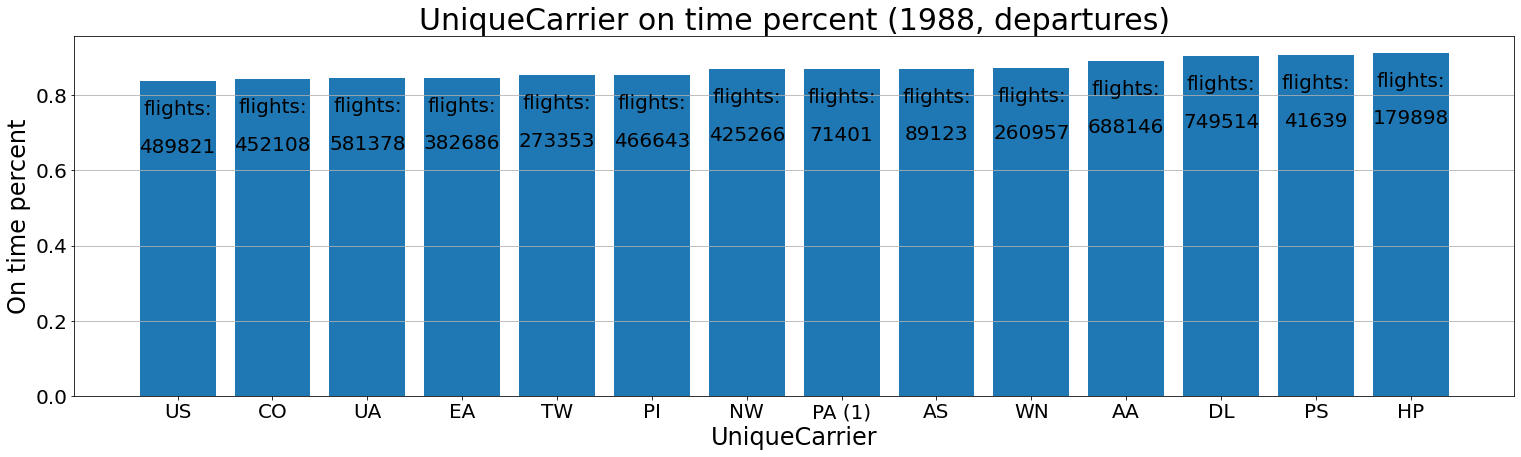

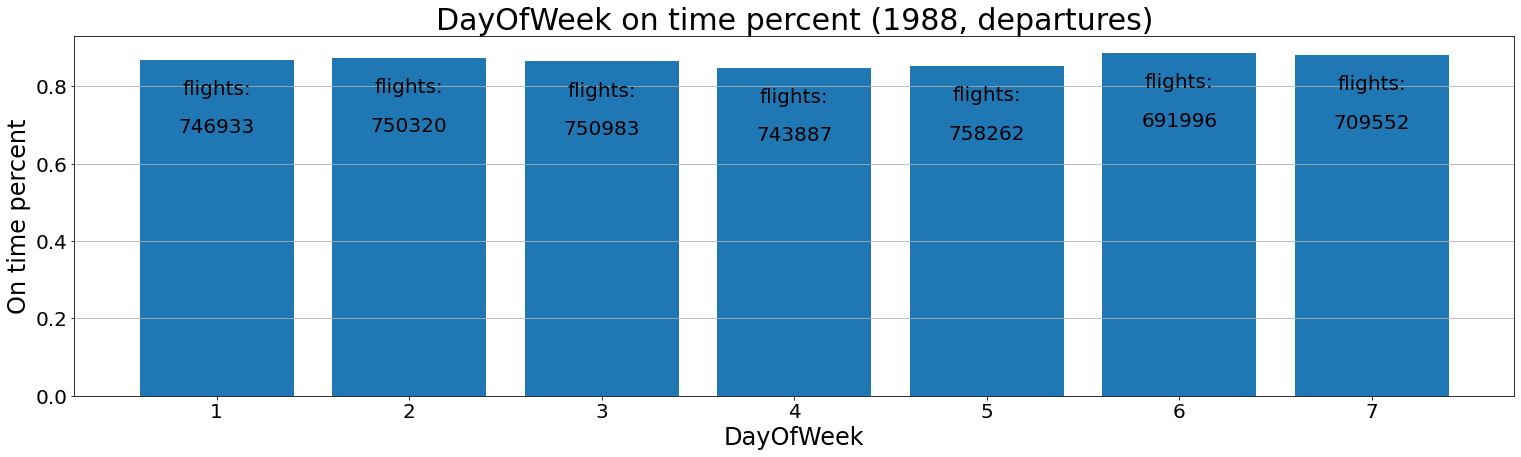

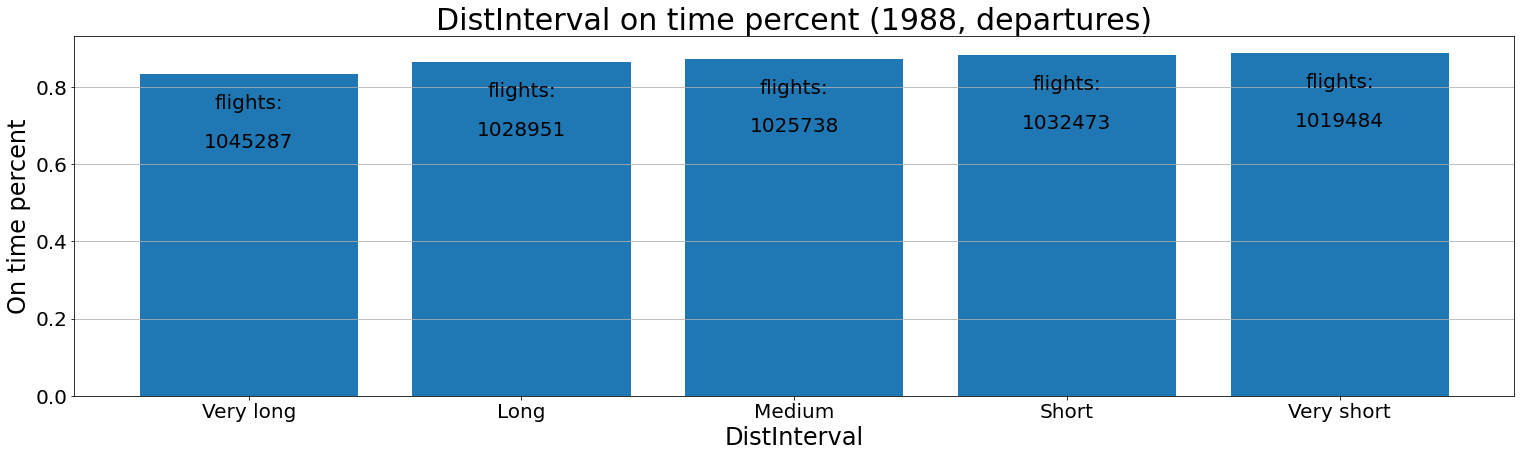

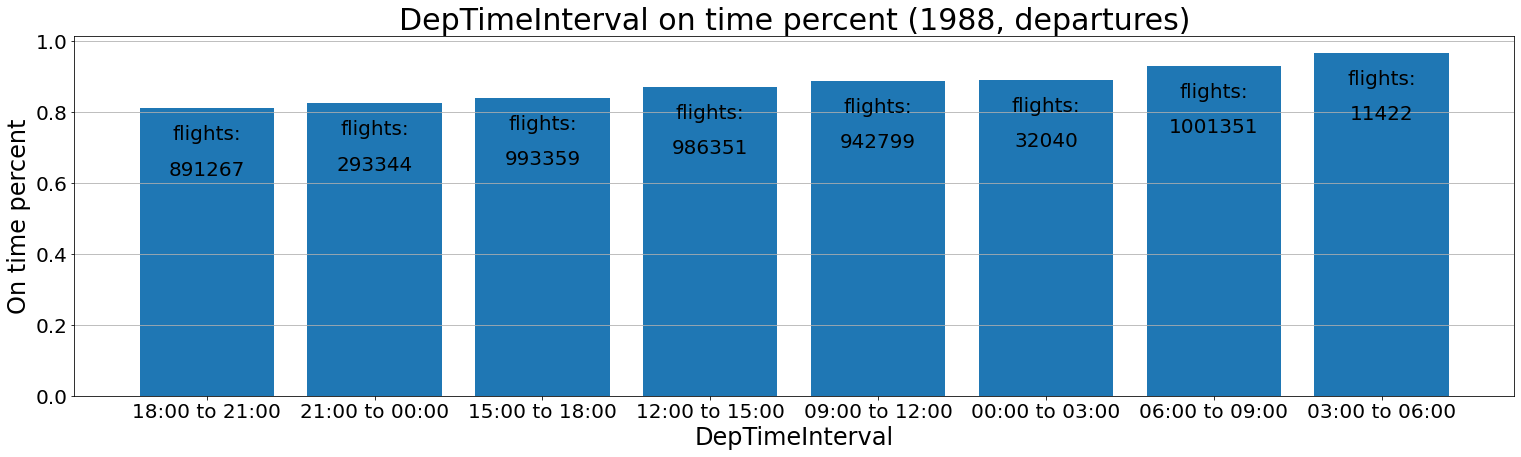

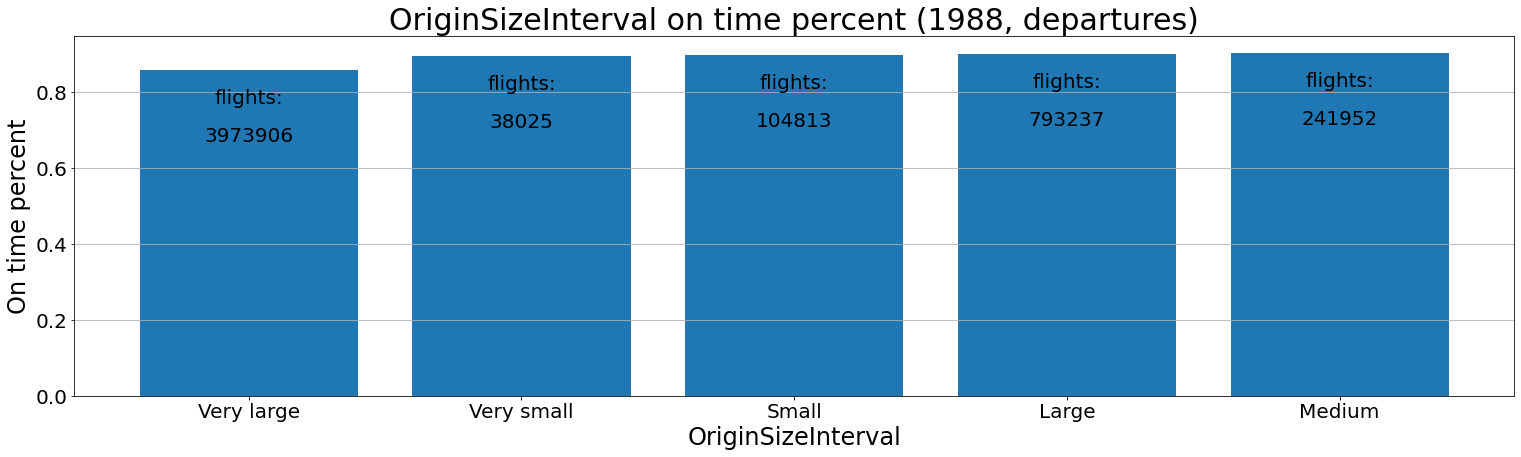

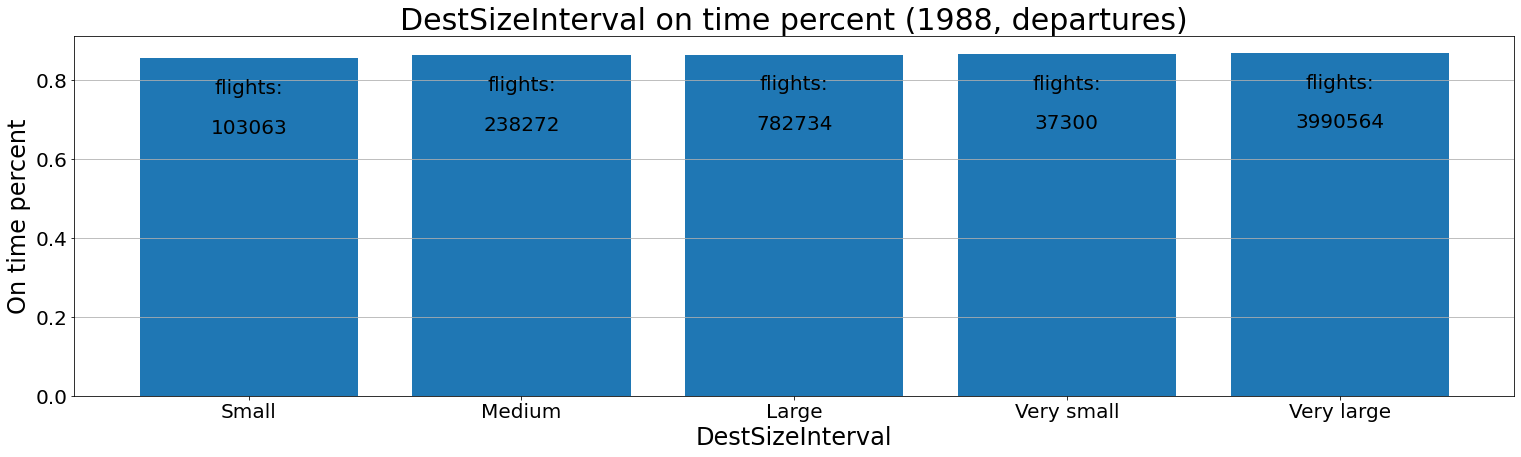

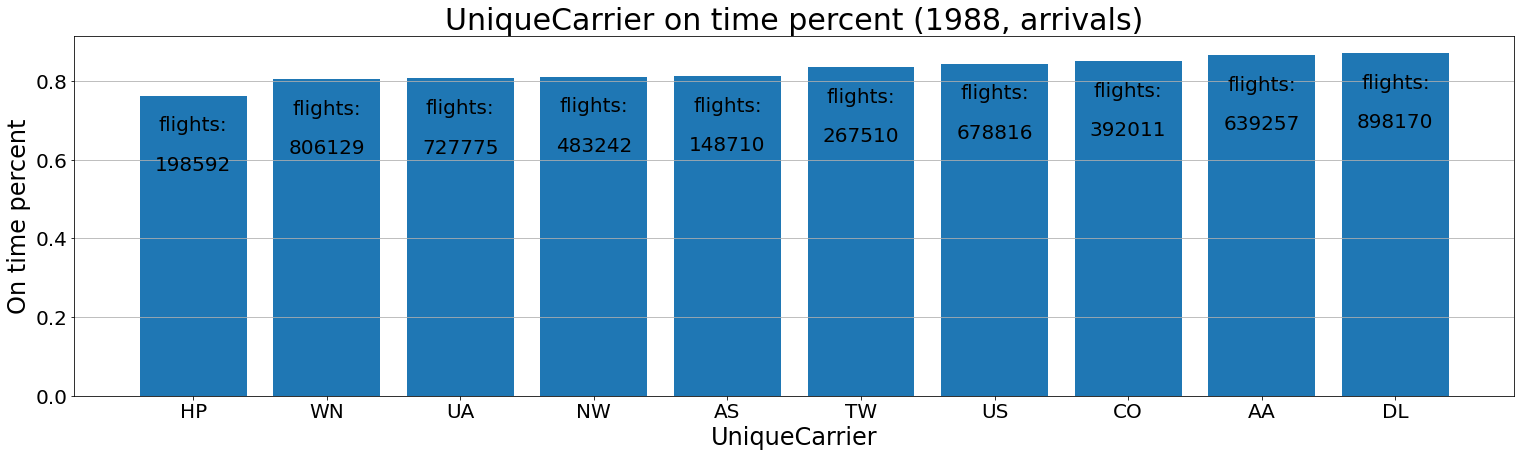

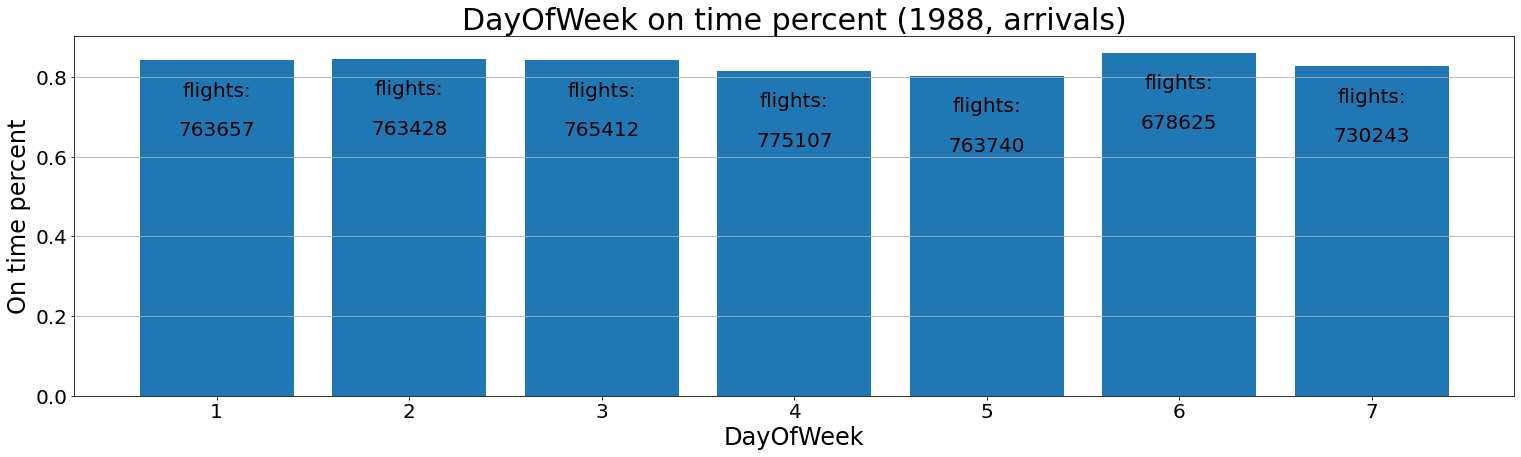

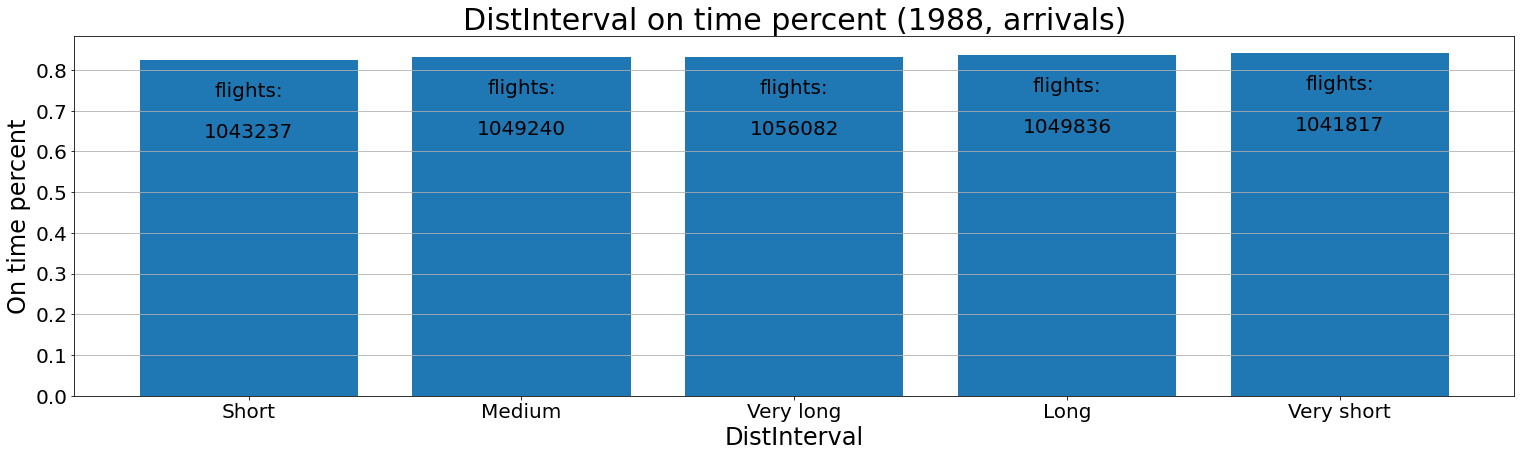

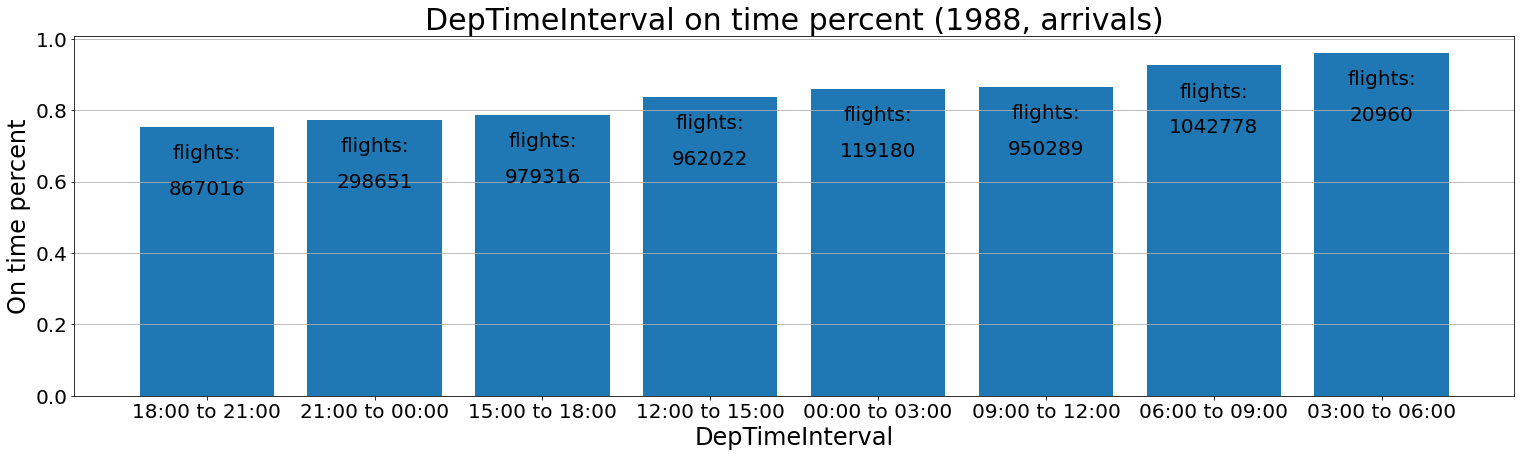

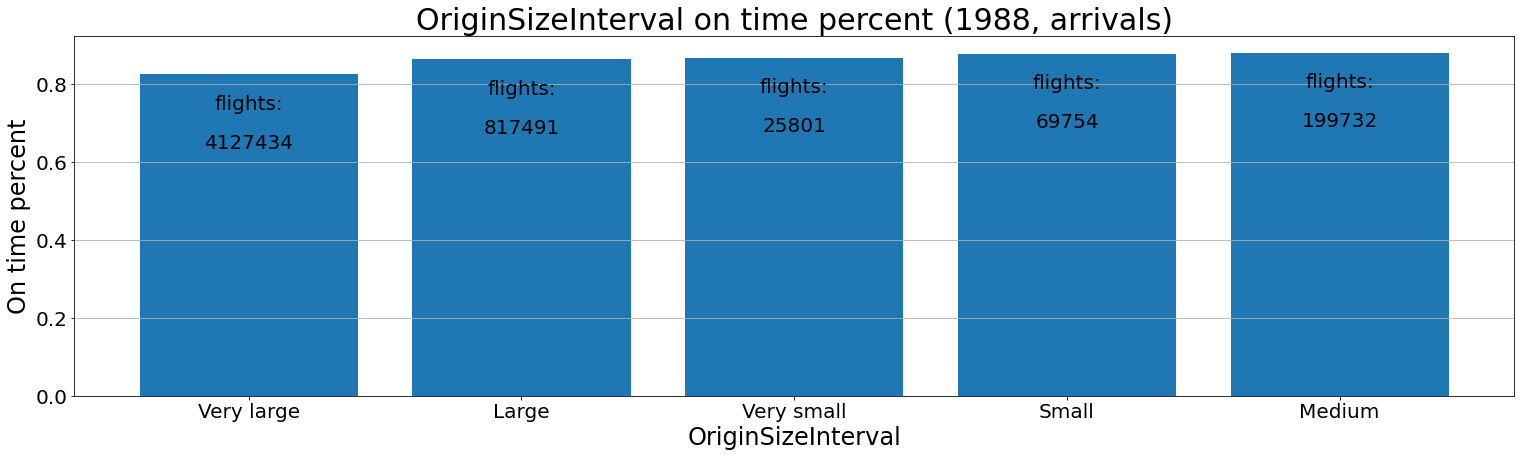

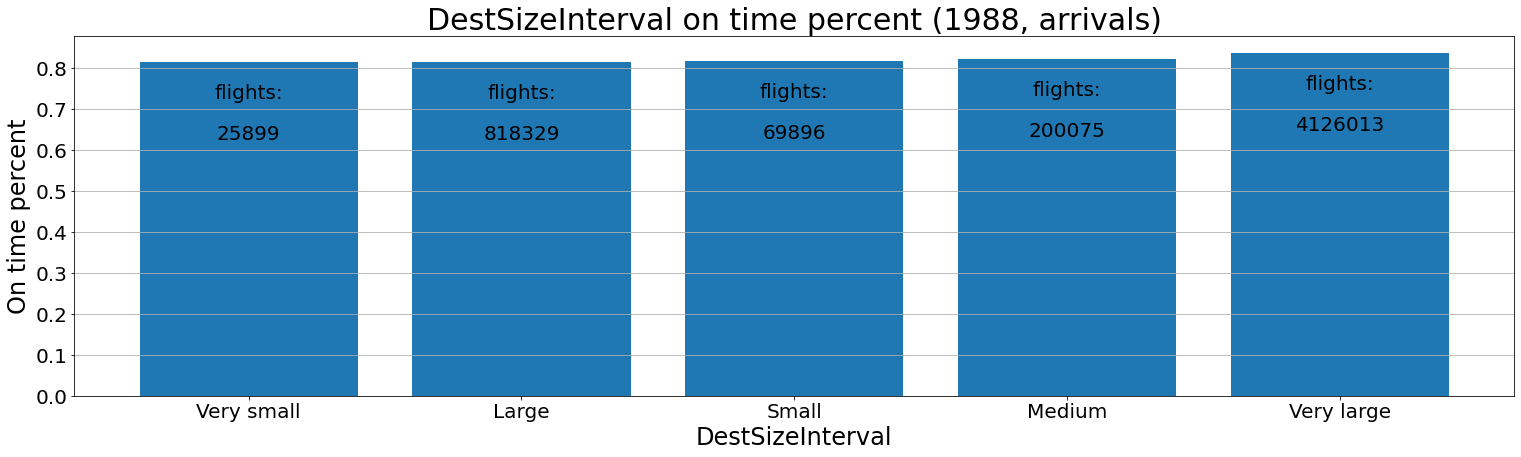

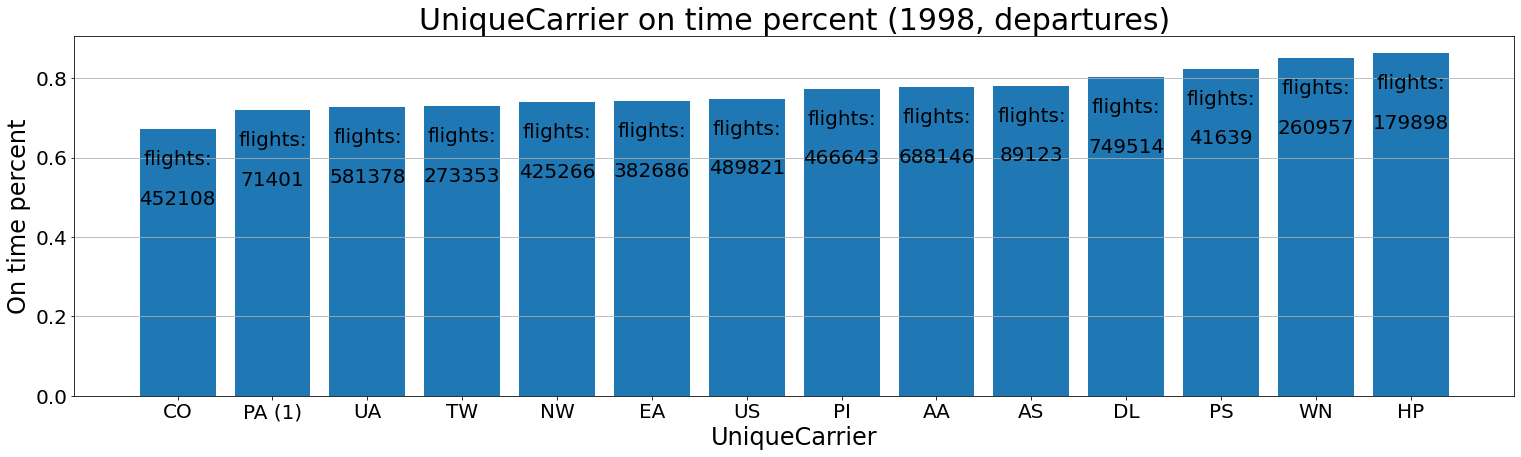

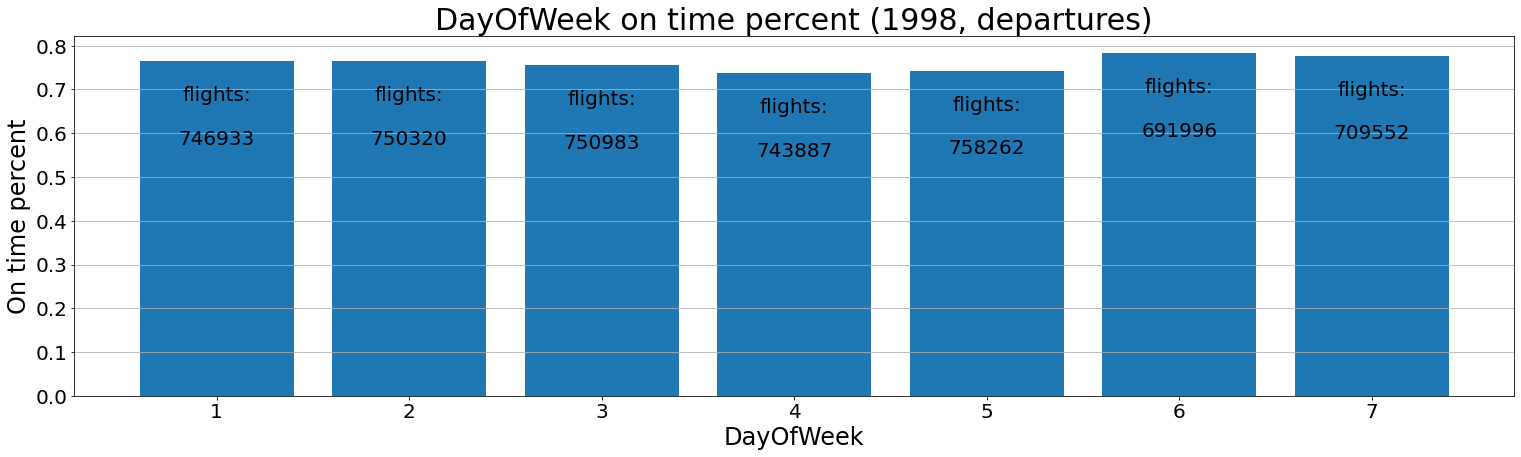

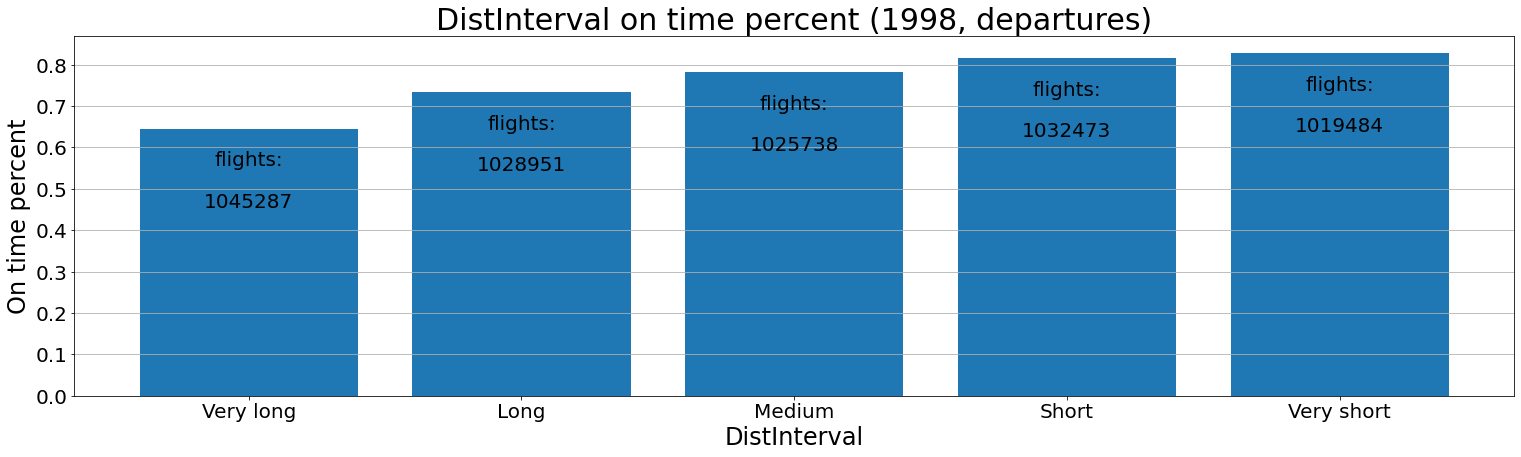

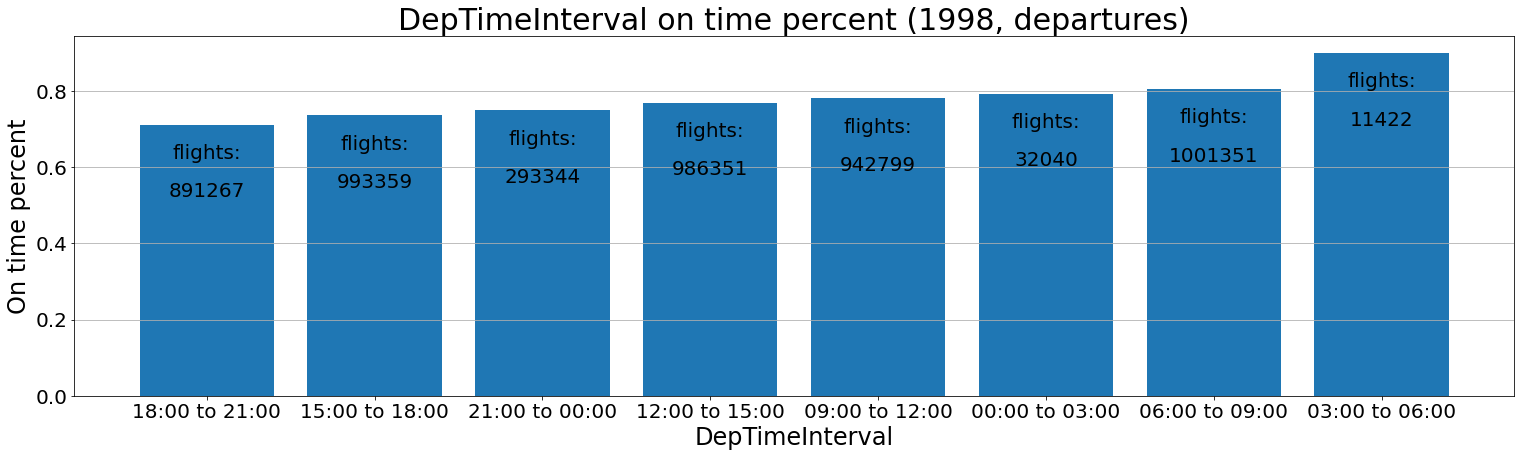

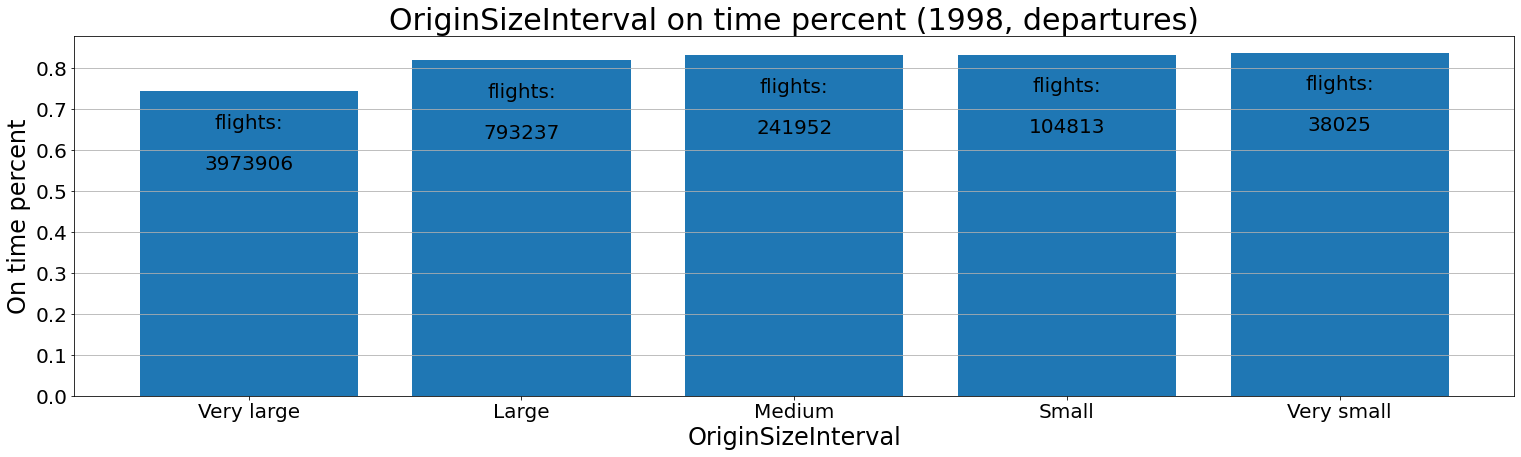

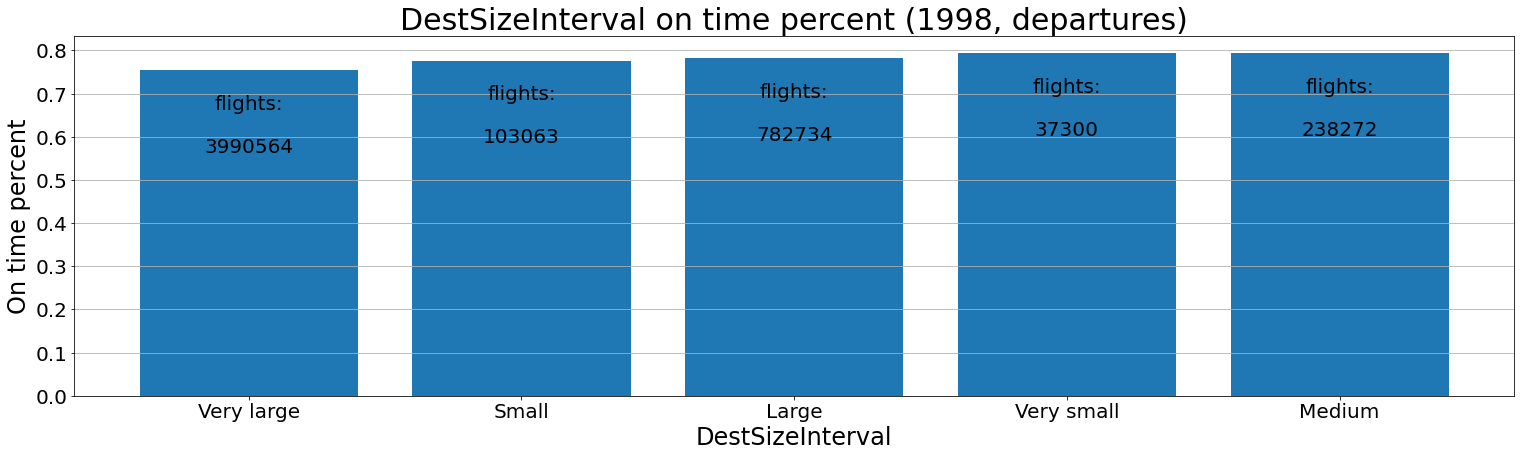

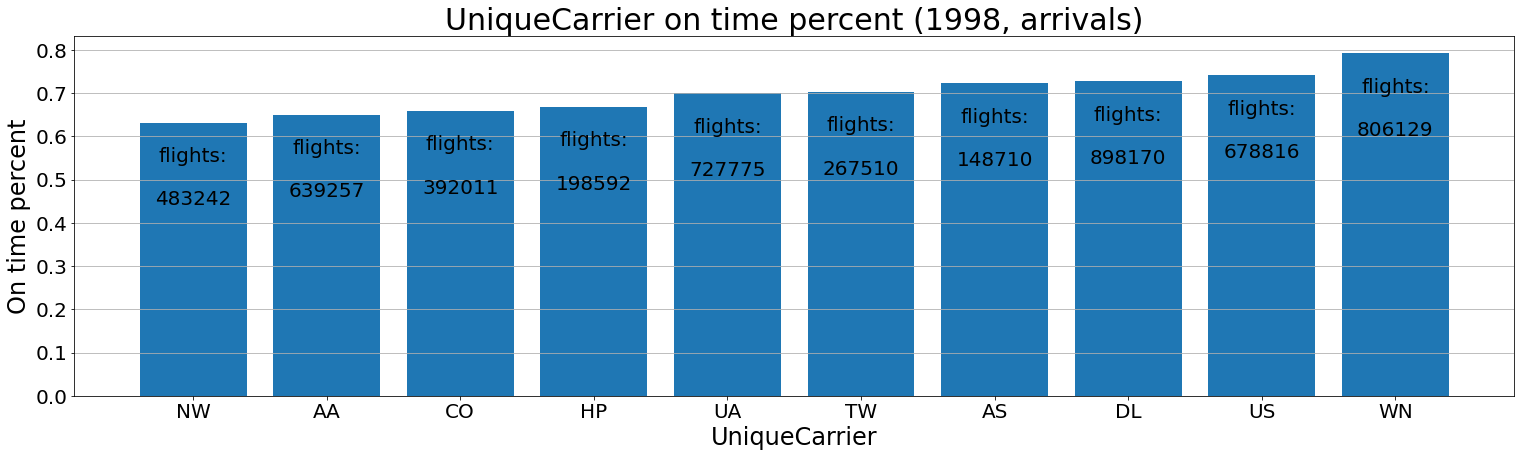

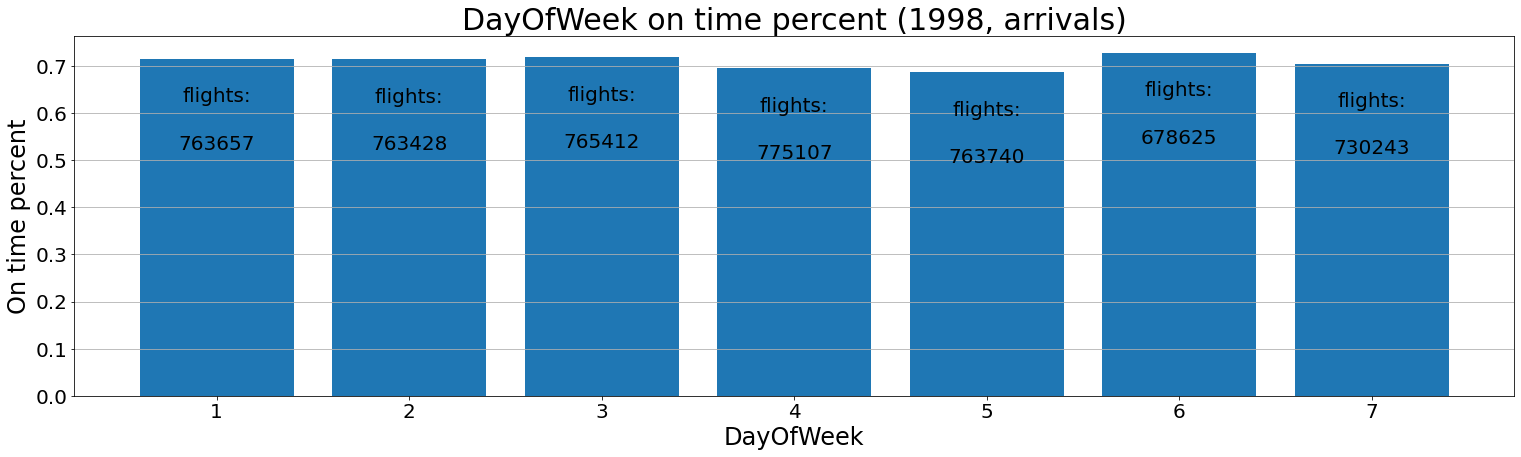

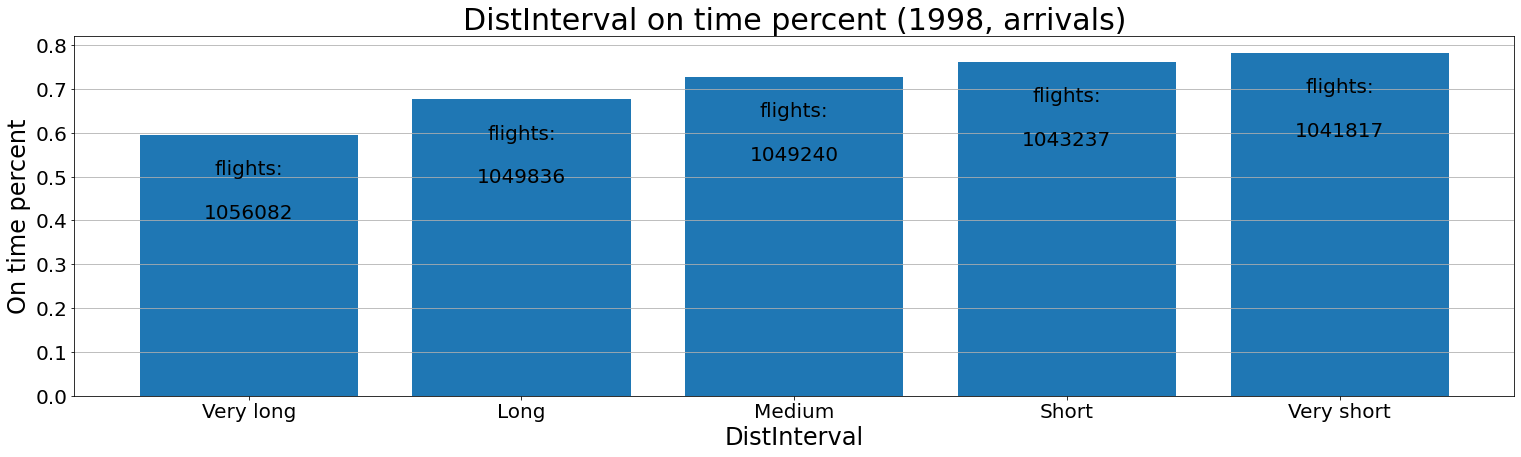

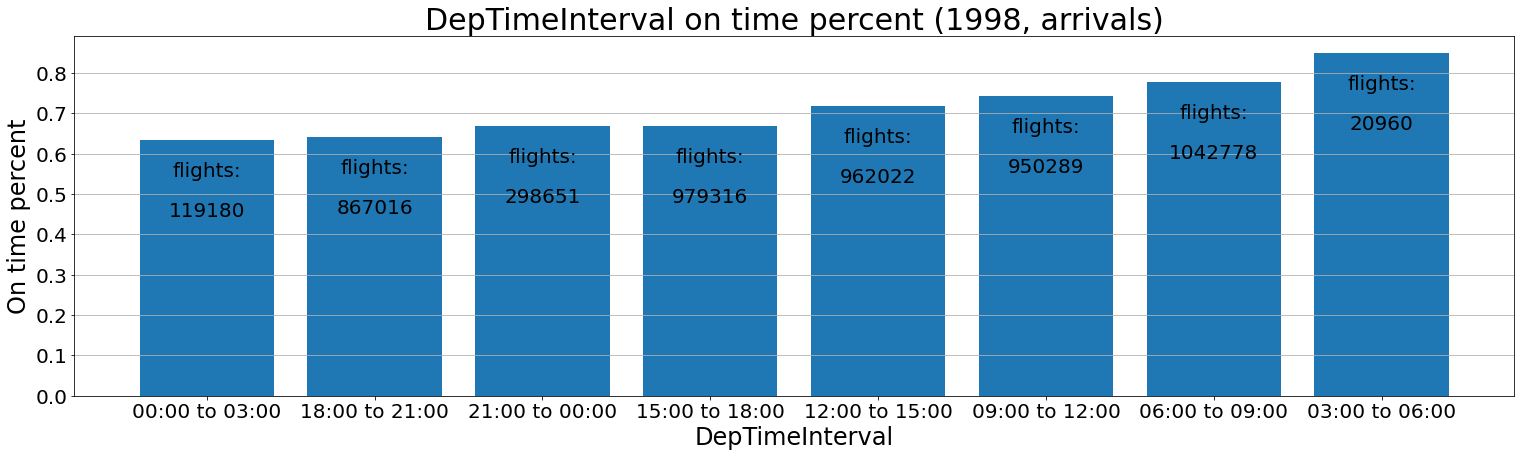

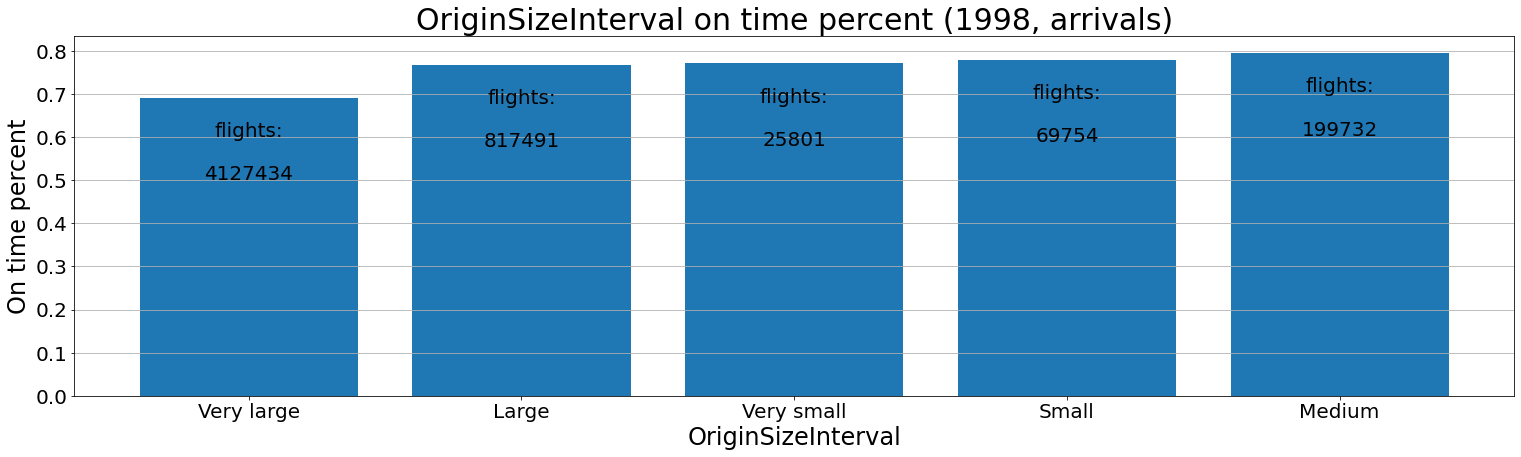

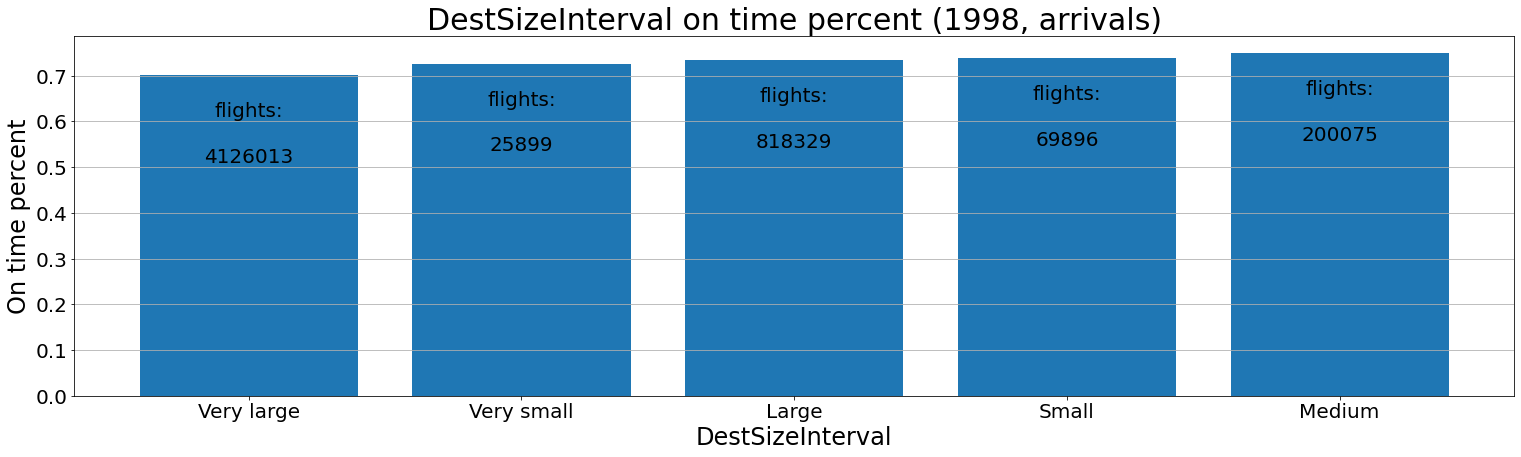

In [32]:
index_value = 0
for i in df_list:
    plot_things(i, df_list_titles[index_value])
    index_value += 1

Below shows mean departure and arrival delay grouped by each feature, along with the number of data points per value

This data is for 1988

In [33]:
def show_df_delays(df, col):
    print("Delays and on time % by ", col)
    print("")
    tempdf = df.sample(n=1000000, random_state=10000).groupby(col)[['DepDelay','ArrDelay','ActualElapsedTime']].mean()
 
    indices = df[col].unique()
    metrics_l = []
    for i in indices:
        x = np.around(get_percentage(df, col, i, 15), decimals=4)
        n_flights = len(df[df[col]==i][col])
        metrics_l.append([i, x])    
    metrics_df = pd.DataFrame(metrics_l).set_index(0)
    metrics_df = metrics_df.rename(columns = {1:'DepOnTime%'})

    tempdf = pd.concat([tempdf, metrics_df], axis=1, join="inner")    
    
    indices = df[col].unique()
    metrics_l = []
    for i in indices:
        x = np.around(get_percentage_arr(df, col, i, 15), decimals=4)
        n_flights = len(df[df[col]==i][col])
        metrics_l.append([i, x])    
    metrics_df = pd.DataFrame(metrics_l).set_index(0)
    metrics_df = metrics_df.rename(columns = {1:'ArrOnTime%'})    
    
    tempdf = pd.concat([tempdf, metrics_df], axis=1, join="inner")
    tempdf['ValueCountsSample'] = df1988nc.sample(n=1000000, random_state=10000)[col].value_counts()
    tempdf['ValueCounts'] = df1988nc[col].value_counts()
    print(tempdf)
    print("")
    print("Difference between min and max (dep):")
    print(np.around(tempdf['DepOnTime%'].max()-tempdf['DepOnTime%'].min(), decimals=4))
    print("")
    print("Difference between min and max (arr):")
    print(np.around(tempdf['ArrOnTime%'].max()-tempdf['ArrOnTime%'].min(), decimals=4))
#this is the old function, but it prints out in jupyter nicer
#tempdf = df1988nc.sample(n=1000000, random_state=10000).groupby('ArrTimeInterval')[['ArrDelay','DepDelay','ActualElapsedTime']].mean()
#tempdf['ValueCountsSample'] = df1988nc.sample(n=1000000, random_state=10000)['ArrTimeInterval'].value_counts()
#tempdf['ValueCounts'] = df1988nc['ArrTimeInterval'].value_counts()
#tempdf

In [34]:
show_df_delays(df1988nc, 'DayOfWeek')

Delays and on time % by  DayOfWeek

   DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
1  6.972464  6.830346         103.338678      0.8692      0.7652   
2  6.482097  6.785418         104.153553      0.8724      0.7657   
3  6.842509  7.372154         103.960644      0.8642      0.7560   
4  7.464171  8.122982         104.065757      0.8482      0.7384   
5  7.366194  7.710939         104.065078      0.8517      0.7432   
6  5.533496  3.926274         104.243986      0.8862      0.7834   
7  6.118656  4.686288         104.099807      0.8815      0.7775   

   ValueCountsSample  ValueCounts  
1             144791       746933  
2             145369       750320  
3             146707       750983  
4             144647       743887  
5             146993       758262  
6             134104       691996  
7             137389       709552  

Difference between min and max (dep):
0.038

Difference between min and max (arr):
0.045


In [35]:
show_df_delays(df1988nc, 'Month')

Delays and on time % by  Month

     DepDelay   ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
1   10.569270  11.946645         103.950085      0.7981      0.6859   
2    8.286259   9.255771         103.691854      0.8354      0.7284   
3    6.808032   7.185722         104.250817      0.8642      0.7545   
4    5.873464   5.184741         103.527568      0.8857      0.7761   
5    6.500770   5.933058         103.311914      0.8768      0.7729   
6    5.048651   3.855946         103.041672      0.8948      0.7885   
7    6.756038   5.916261         104.172693      0.8703      0.7701   
8    6.102268   5.228163         104.017877      0.8810      0.7868   
9    4.008676   3.340048         103.398387      0.9161      0.8070   
10   5.233904   4.798424         103.610715      0.8929      0.7950   
11   7.305426   7.830404         105.058035      0.8530      0.7407   
12   8.086479   8.276524         105.795823      0.8361      0.7214   

    ValueCountsSample  ValueCounts  
1      

In [36]:
show_df_delays(df1988nc, 'DepTimeInterval')

Delays and on time % by  DepTimeInterval

                DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
00:00 to 03:00  6.850547  2.473684         134.706490      0.8914      0.7926   
03:00 to 06:00  0.950656 -0.321672          76.767378      0.9672      0.8991   
06:00 to 09:00  3.555428  3.537486         105.318259      0.9310      0.8048   
09:00 to 12:00  5.254385  5.048752         106.813717      0.8882      0.7810   
12:00 to 15:00  6.281256  6.256550         106.140243      0.8714      0.7688   
15:00 to 18:00  8.197937  8.655900         101.256240      0.8404      0.7358   
18:00 to 21:00  9.964828  9.510226         102.424058      0.8111      0.7107   
21:00 to 00:00  8.740379  6.992242          94.744475      0.8246      0.7492   

                ValueCountsSample  ValueCounts  
00:00 to 03:00               6216        32040  
03:00 to 06:00               2209        11422  
06:00 to 09:00             194686      1001351  
09:00 to 12:00             18303

In [37]:
show_df_delays(df1988nc, 'ArrTimeInterval')

Delays and on time % by  ArrTimeInterval

                 DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  \
00:00 to 03:00   9.582443  5.111683         112.663346      0.8384   
03:00 to 06:00   4.938310  3.220382         208.164605      0.9052   
06:00 to 09:00   2.732543  3.074569          83.239368      0.9478   
09:00 to 12:00   4.424295  4.305005         103.850781      0.9069   
12:00 to 15:00   5.399609  5.159660         102.525068      0.8868   
15:00 to 18:00   6.914108  7.232282         105.340702      0.8625   
18:00 to 21:00   9.200963  9.314907         109.277862      0.8220   
21:00 to 00:00  10.425442  9.279192         107.090720      0.8011   

                ArrOnTime%  ValueCountsSample  ValueCounts  
00:00 to 03:00      0.7456              11893        61389  
03:00 to 06:00      0.7747               4782        24631  
06:00 to 09:00      0.8474              95795       492214  
09:00 to 12:00      0.7863             184815       951650  
12:00 to 15:00      0.

In [38]:
show_df_delays(df1988nc, 'DistInterval')

Delays and on time % by  DistInterval

            DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
Long        7.063764  6.883522         120.070852      0.8635      0.7345   
Medium      6.221259  6.287344          85.224476      0.8730      0.7830   
Short       5.992177  5.985363          65.440010      0.8809      0.8155   
Very long   8.788993  7.702526         200.315319      0.8325      0.6458   
Very short  5.398409  5.802230          47.395281      0.8874      0.8284   

            ValueCountsSample  ValueCounts  
Long                   199518      1028951  
Medium                 199124      1025738  
Short                  200701      1032473  
Very long              202662      1045287  
Very short             197995      1019484  

Difference between min and max (dep):
0.0549

Difference between min and max (arr):
0.1826


In [39]:
show_df_delays(df1988nc, 'UniqueCarrier')

Delays and on time % by  UniqueCarrier

        DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
AA      5.701573  4.197753         119.552448      0.8912      0.7766   
AS      5.675439  7.653949          92.888490      0.8713      0.7813   
CO      8.545573  5.723457         125.016715      0.8435      0.6709   
DL      5.081583  6.157358         103.010530      0.9035      0.8025   
EA      8.805241  7.609862         105.437060      0.8467      0.7427   
HP      4.266282  4.106752          81.154990      0.9129      0.8633   
NW      5.888720  7.775089         106.339975      0.8699      0.7390   
PA (1)  5.968280  8.270398         114.171557      0.8701      0.7201   
PI      7.876637  8.702282          75.493013      0.8536      0.7734   
PS      4.402329  1.257599          73.335456      0.9073      0.8241   
TW      7.134969  7.919687         116.778258      0.8533      0.7296   
UA      7.509744  7.351423         127.029485      0.8449      0.7280   
US      7.3

In [40]:
show_df_delays(df1988nc, 'Holiday')

Delays and on time % by  Holiday

   DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
0  6.689794  6.557845         103.988677      0.8671      0.7609   
1  7.085249  5.765417         103.906850      0.8738      0.7629   

   ValueCountsSample  ValueCounts  
0             972070      5007239  
1              27930       144694  

Difference between min and max (dep):
0.0067

Difference between min and max (arr):
0.002


In [41]:
show_df_delays(df1988nc, 'Weekend')

Delays and on time % by  Weekend

   DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
0  7.025518  7.364922         103.917590      0.8611      0.7537   
1  5.829616  4.310897         104.171021      0.8839      0.7805   

   ValueCountsSample  ValueCounts  
0             728507      3750385  
1             271493      1401548  

Difference between min and max (dep):
0.0228

Difference between min and max (arr):
0.0268


In [42]:
show_df_delays(df1988nc, 'OriginSizeInterval')

Delays and on time % by  OriginSizeInterval

            DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
Large       4.959212  5.399896          87.641053      0.8997      0.8188   
Medium      4.475404  5.332584          65.147042      0.9018      0.8311   
Small       4.570718  5.130450          58.332387      0.8977      0.8317   
Very large  7.261123  6.882457         111.262504      0.8577      0.7426   
Very small  4.453048  5.494069          56.638897      0.8950      0.8366   

            ValueCountsSample  ValueCounts  
Large                  153844       793237  
Medium                  46857       241952  
Small                   20504       104813  
Very large             771511      3973906  
Very small               7284        38025  

Difference between min and max (dep):
0.0441

Difference between min and max (arr):
0.094


In [43]:
show_df_delays(df1988nc, 'DestSizeInterval')

Delays and on time % by  DestSizeInterval

            DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
Large       6.806029  5.956163          87.472853      0.8645      0.7824   
Medium      6.637512  6.171917          65.364613      0.8621      0.7942   
Small       6.934353  6.786202          58.795384      0.8548      0.7765   
Very large  6.689817  6.674383         111.079763      0.8685      0.7541   
Very small  5.449058  5.494168          62.719775      0.8661      0.7940   

            ValueCountsSample  ValueCounts  
Large                  151729       782734  
Medium                  46214       238272  
Small                   20001       103063  
Very large             774734      3990564  
Very small               7322        37300  

Difference between min and max (dep):
0.0137

Difference between min and max (arr):
0.0401


1998:

In [44]:
show_df_delays(df1998nc, 'DayOfWeek')

Delays and on time % by  DayOfWeek

    DepDelay   ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
1   8.778172   7.371767         122.969560      0.8420      0.7149   
2   8.213968   7.463549         123.372283      0.8453      0.7145   
3   8.192989   7.553465         123.337533      0.8420      0.7180   
4  10.164120   9.634376         123.978405      0.8157      0.6953   
5  11.109101  10.001196         123.213750      0.8027      0.6870   
6   7.163828   3.622467         124.920672      0.8607      0.7274   
7   9.302990   6.940959         123.748004      0.8272      0.7045   

   ValueCountsSample  ValueCounts  
1             144791       746933  
2             145369       750320  
3             146707       750983  
4             144647       743887  
5             146993       758262  
6             134104       691996  
7             137389       709552  

Difference between min and max (dep):
0.058

Difference between min and max (arr):
0.0404


In [45]:
show_df_delays(df1998nc, 'Month')

Delays and on time % by  Month

     DepDelay   ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
1    9.332271   8.521610         124.395947      0.8237      0.6954   
2    8.943294   8.171600         123.127088      0.8297      0.6821   
3    9.564600   8.469308         123.357729      0.8196      0.6976   
4    8.224198   6.884538         122.680820      0.8467      0.7146   
5    9.326966   8.347458         122.851025      0.8341      0.7132   
6   13.608729  13.754732         124.921780      0.7766      0.6618   
7    9.317207   7.424951         123.215571      0.8332      0.7370   
8    9.460693   8.148734         123.891986      0.8319      0.7282   
9    6.068342   3.305322         122.025149      0.8786      0.7528   
10   6.748135   5.015082         122.872240      0.8667      0.7391   
11   6.060016   3.238417         124.445275      0.8758      0.7302   
12  11.381343   9.502733         125.676338      0.7853      0.6495   

    ValueCountsSample  ValueCounts  
1      

In [46]:
show_df_delays(df1998nc, 'DepTimeInterval')

Delays and on time % by  DepTimeInterval

                 DepDelay   ArrDelay  ActualElapsedTime  DepOnTime%  \
00:00 to 03:00   6.839388   3.116376         166.404243      0.8583   
03:00 to 06:00   1.315253   0.026670          87.596959      0.9602   
06:00 to 09:00   3.512838   2.330770         126.472341      0.9253   
09:00 to 12:00   6.675551   5.078976         123.538483      0.8638   
12:00 to 15:00   8.591415   7.060240         121.716664      0.8362   
15:00 to 18:00  11.859779  11.021884         122.388726      0.7862   
18:00 to 21:00  15.009428  13.225836         118.677375      0.7531   
21:00 to 00:00  11.755397  10.188819         124.118459      0.7725   

                ArrOnTime%  ValueCountsSample  ValueCounts  
00:00 to 03:00      0.6342               6216        32040  
03:00 to 06:00      0.8500               2209        11422  
06:00 to 09:00      0.7777             194686      1001351  
09:00 to 12:00      0.7427             183030       942799  
12:00 to 15:0

In [47]:
show_df_delays(df1998nc, 'ArrTimeInterval')

Delays and on time % by  ArrTimeInterval

                 DepDelay   ArrDelay  ActualElapsedTime  DepOnTime%  \
00:00 to 03:00   9.112251   5.648988         159.124190      0.8232   
03:00 to 06:00   5.200649   1.266686         231.437176      0.8780   
06:00 to 09:00   2.846922   2.049906         102.307162      0.9353   
09:00 to 12:00   4.921919   3.775216         120.316639      0.8968   
12:00 to 15:00   7.017465   5.363128         120.885387      0.8570   
15:00 to 18:00   9.681602   8.540627         122.287617      0.8194   
18:00 to 21:00  13.346836  11.960761         126.783865      0.7728   
21:00 to 00:00  14.304407  12.446838         130.118505      0.7548   

                ArrOnTime%  ValueCountsSample  ValueCounts  
00:00 to 03:00      0.6252              11893        61389  
03:00 to 06:00      0.6645               4782        24631  
06:00 to 09:00      0.8228              95795       492214  
09:00 to 12:00      0.7624             184815       951650  
12:00 to 15:0

In [48]:
show_df_delays(df1998nc, 'DistInterval')

Delays and on time % by  DistInterval

            DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
Long        8.827505  7.264312         144.127980      0.8371      0.6762   
Medium      9.445919  8.252235         105.349859      0.8310      0.7282   
Short       9.242728  8.582185          77.285276      0.8240      0.7625   
Very long   9.727203  6.372906         232.637844      0.8324      0.5949   
Very short  7.839707  7.442931          57.683939      0.8417      0.7823   

            ValueCountsSample  ValueCounts  
Long                   199518      1028951  
Medium                 199124      1025738  
Short                  200701      1032473  
Very long              202662      1045287  
Very short             197995      1019484  

Difference between min and max (dep):
0.0177

Difference between min and max (arr):
0.1874


In [49]:
show_df_delays(df1998nc, 'UniqueCarrier')

Delays and on time % by  UniqueCarrier

     DepDelay   ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
AA   7.489002   4.476682         163.866944      0.8659      0.6502   
AS   9.107917  11.283826         118.126043      0.8124      0.7224   
CO   8.353714   7.829014         149.999521      0.8512      0.6593   
DL   7.066624   5.758141         120.685081      0.8714      0.7274   
HP  13.853510  15.296568         131.841148      0.7632      0.6684   
NW  10.437966   7.898840         124.817281      0.8113      0.6317   
TW   9.106753   7.511318         130.327089      0.8347      0.7032   
UA  11.695137  10.916869         141.612935      0.8066      0.6995   
US   7.367072   6.183393         103.545643      0.8444      0.7419   
WN   9.627356   7.374143          78.935176      0.8044      0.7927   

    ValueCountsSample  ValueCounts  
AA             133413       688146  
AS              17328        89123  
CO              87946       452108  
DL             145472       74

In [50]:
show_df_delays(df1998nc, 'Holiday')

Delays and on time % by  Holiday

   DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
0  9.083734  7.691010         123.623536      0.8325      0.7082   
1  6.973027  4.121089         123.810879      0.8576      0.7192   

   ValueCountsSample  ValueCounts  
0             972070      5007239  
1              27930       144694  

Difference between min and max (dep):
0.0251

Difference between min and max (arr):
0.011


In [51]:
show_df_delays(df1998nc, 'Weekend')

Delays and on time % by  Weekend

   DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
0  9.295483  8.409889         123.376240      0.8295      0.7059   
1  8.270250  5.338443         124.314291      0.8433      0.7155   

   ValueCountsSample  ValueCounts  
0             728507      3750385  
1             271493      1401548  

Difference between min and max (dep):
0.0138

Difference between min and max (arr):
0.0096


In [52]:
show_df_delays(df1998nc, 'OriginSizeInterval')

Delays and on time % by  OriginSizeInterval

            DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
Large       6.885137  5.620955         104.500314      0.8632      0.7674   
Medium      6.054459  5.403498          78.722862      0.8791      0.7946   
Small       5.725167  4.682874          69.843434      0.8769      0.7793   
Very large  9.649119  8.133472         130.822044      0.8241      0.6911   
Very small  7.993496  6.384737          76.171060      0.8662      0.7708   

            ValueCountsSample  ValueCounts  
Large                  153844       793237  
Medium                  46857       241952  
Small                   20504       104813  
Very large             771511      3973906  
Very small               7284        38025  

Difference between min and max (dep):
0.055

Difference between min and max (arr):
0.1035


In [53]:
show_df_delays(df1998nc, 'DestSizeInterval')

Delays and on time % by  DestSizeInterval

            DepDelay  ArrDelay  ActualElapsedTime  DepOnTime%  ArrOnTime%  \
Large       9.645252  8.202722         103.915624      0.8163      0.7346   
Medium      8.643652  7.990368          77.350697      0.8230      0.7497   
Small       9.702396  7.298449          69.703723      0.8178      0.7380   
Very large  8.901146  7.439366         130.953016      0.8375      0.7007   
Very small  9.123507  8.270655          78.338014      0.8159      0.7266   

            ValueCountsSample  ValueCounts  
Large                  151729       782734  
Medium                  46214       238272  
Small                   20001       103063  
Very large             774734      3990564  
Very small               7322        37300  

Difference between min and max (dep):
0.0216

Difference between min and max (arr):
0.049


In [54]:
#pearson correlation for delays on 1988 attributes
df1988nc.sample(n=1000000, random_state=10000).corr(method='pearson')[['ArrDelay','DepDelay']]

,ArrDelay,DepDelay
Month,-0.040041,-0.030313
DayofMonth,-0.005452,0.000143
DayOfWeek,-0.034767,-0.012241
DepTime,0.116142,0.125300
CRSDepTime,0.087201,0.098350
ArrTime,0.070908,0.070716
CRSArrTime,0.091635,0.100156
ActualElapsedTime,0.123526,0.073419
CRSElapsedTime,0.019510,0.062267
AirTime,NaN,NaN


In [55]:
#pearson correlation for delays on 1998 attributes
df1998nc.sample(n=1000000, random_state=10000).corr(method='pearson')[['ArrDelay','DepDelay']]

,ArrDelay,DepDelay
Month,-0.031295,-0.014435
DayofMonth,-0.001689,0.004710
DayOfWeek,-0.013102,0.006500
DepTime,0.154331,0.157077
CRSDepTime,0.116679,0.116049
ArrTime,0.058788,0.058789
CRSArrTime,0.107818,0.108460
ActualElapsedTime,0.064935,0.023956
CRSElapsedTime,-0.021538,0.018402
AirTime,0.017379,0.016354


Below contains dataframes for answering the second question

'What characterizes successful airlines?'

In [56]:
#average delays for both arrival and departure for 1988
#also includes average flight length by carrier
df_growth1 = pd.DataFrame(df1988nc.sample(n=1000000, random_state=10000).groupby('UniqueCarrier')[['ArrDelay','DepDelay','ActualElapsedTime']].mean())
df_growth1 = df_growth1.rename(columns = {"ArrDelay":"ArrDelay1988", "DepDelay":"DepDelay1988", "ActualElapsedTime":"Time1988"})

'''
#yes, i should wrap this in a function, but i only call this twice
dfg1indices = df1988nc['UniqueCarrier'].unique()
metrics_l = []
for i in dfg1indices:
    x = np.around(get_percentage(df1988nc, 'UniqueCarrier', i, 15), decimals=4)
    n_flights = len(df1988nc[df1988nc['UniqueCarrier']==i]['UniqueCarrier'])
    metrics_l.append([i, x])    
tempdf = pd.DataFrame(metrics_l).set_index(0)
tempdf = tempdf.rename(columns = {1:'DepOnTime%1988'})

df_growth1 = pd.concat([df_growth1, tempdf], axis=1, join="inner")    

dfg1indices = df1988nc['UniqueCarrier'].unique()
metrics_l = []
for i in dfg1indices:
    x = np.around(get_percentage_arr(df1988nc, 'UniqueCarrier', i, 15), decimals=4)
    n_flights = len(df1988nc[df1988nc['UniqueCarrier']==i]['UniqueCarrier'])
    metrics_l.append([i, x])    
tempdf = pd.DataFrame(metrics_l).set_index(0)
tempdf = tempdf.rename(columns = {1:'ArrOnTime%1988'})

df_growth1 = pd.concat([df_growth1, tempdf], axis=1, join="inner")  
'''
df_growth1

,ArrDelay1988,DepDelay1988,Time1988
UniqueCarrier,,,
AA,4.197753,5.701573,119.552448
AS,7.653949,5.675439,92.888490
CO,5.723457,8.545573,125.016715
DL,6.157358,5.081583,103.010530
EA,7.609862,8.805241,105.437060
HP,4.106752,4.266282,81.154990
NW,7.775089,5.888720,106.339975
PA (1),8.270398,5.968280,114.171557
PI,8.702282,7.876637,75.493013


In [57]:
#average delays for both arrival and departure for 1998
#also includes average flight length by carrier
df_growth2 = pd.DataFrame(df1998nc.sample(n=1000000, random_state=10000).groupby('UniqueCarrier')[['ArrDelay','DepDelay','ActualElapsedTime']].mean())
df_growth2 = df_growth2.rename(columns = {"ArrDelay":"ArrDelay1998", "DepDelay":"DepDelay1998", "ActualElapsedTime":"Time1998"})

'''
dfg1indices = df1998nc['UniqueCarrier'].unique()
metrics_l = []
for i in dfg1indices:
    x = np.around(get_percentage(df1998nc, 'UniqueCarrier', i, 15), decimals=4)
    n_flights = len(df1998nc[df1998nc['UniqueCarrier']==i]['UniqueCarrier'])
    metrics_l.append([i, x])    
tempdf = pd.DataFrame(metrics_l).set_index(0)
tempdf = tempdf.rename(columns = {1:'DepOnTime%1998'})

df_growth2 = pd.concat([df_growth2, tempdf], axis=1, join="inner")    

dfg1indices = df1998nc['UniqueCarrier'].unique()
metrics_l = []
for i in dfg1indices:
    x = np.around(get_percentage_arr(df1998nc, 'UniqueCarrier', i, 15), decimals=4)
    n_flights = len(df1998nc[df1998nc['UniqueCarrier']==i]['UniqueCarrier'])
    metrics_l.append([i, x])    
tempdf = pd.DataFrame(metrics_l).set_index(0)
tempdf = tempdf.rename(columns = {1:'ArrOnTime%1998'})

df_growth2 = pd.concat([df_growth2, tempdf], axis=1, join="inner")  
'''
df_growth2

,ArrDelay1998,DepDelay1998,Time1998
UniqueCarrier,,,
AA,4.476682,7.489002,163.866944
AS,11.283826,9.107917,118.126043
CO,7.829014,8.353714,149.999521
DL,5.758141,7.066624,120.685081
HP,15.296568,13.853510,131.841148
NW,7.898840,10.437966,124.817281
TW,7.511318,9.106753,130.327089
UA,10.916869,11.695137,141.612935
US,6.183393,7.367072,103.545643


In [58]:
#get airline metrics, percentage of flights on-time
#next cell includes a nice dataframe representation instead of just text
#print("1988")
#print(metrics_1988nc_airline.sort_values(by=1))
df_growth1['DepOnTime1988'] = list(metrics_1988nc_airline.sort_values(by=1)[2])
#print("")
#print("1988 (arr)")
#print(metrics_1988nc_airline_arr)
df_growth1['ArrOnTime1988'] = list(metrics_1988nc_airline_arr.sort_values(by=1)[2])
#print("")
df_growth1['NumFlights1988'] = list(metrics_1988nc_airline_arr.sort_values(by=1)[3])

#print("1998")
#print(metrics_1998nc_airline)
df_growth2['DepOnTime1998'] = list(metrics_1998nc_airline.sort_values(by=1)[2])
#print("")
#print("1998 (arr)")
#print(metrics_1998nc_airline_arr)
df_growth2['ArrOnTime1998'] = list(metrics_1998nc_airline_arr.sort_values(by=1)[2])
#print("")
df_growth2['NumFlights1998'] = list(metrics_1998nc_airline_arr.sort_values(by=1)[3])

In [ ]:
#this dataframe is for 1988 metrics
#df_growth1

In [59]:
#this dataframe is a simple concatenation
df_growth = pd.concat([df_growth1, df_growth2], axis=1, sort=False)
df_growth

,ArrDelay1988,DepDelay1988,Time1988,DepOnTime1988,ArrOnTime1988,NumFlights1988,ArrDelay1998,DepDelay1998,Time1998,DepOnTime1998,ArrOnTime1998,NumFlights1998
AA,4.197753,5.701573,119.552448,0.8912,0.7766,688146,4.476682,7.489002,163.866944,0.8659,0.6502,639257.0
AS,7.653949,5.675439,92.888490,0.8713,0.7813,89123,11.283826,9.107917,118.126043,0.8124,0.7224,148710.0
CO,5.723457,8.545573,125.016715,0.8435,0.6709,452108,7.829014,8.353714,149.999521,0.8512,0.6593,392011.0
DL,6.157358,5.081583,103.010530,0.9035,0.8025,749514,5.758141,7.066624,120.685081,0.8714,0.7274,898170.0
EA,7.609862,8.805241,105.437060,0.8467,0.7427,382686,NaN,NaN,NaN,NaN,NaN,NaN
HP,4.106752,4.266282,81.154990,0.9129,0.8633,179898,15.296568,13.853510,131.841148,0.7632,0.6684,198592.0
NW,7.775089,5.888720,106.339975,0.8699,0.7390,425266,7.898840,10.437966,124.817281,0.8113,0.6317,483242.0
PA (1),8.270398,5.968280,114.171557,0.8701,0.7201,71401,NaN,NaN,NaN,NaN,NaN,NaN
PI,8.702282,7.876637,75.493013,0.8536,0.7734,466643,NaN,NaN,NaN,NaN,NaN,NaN
PS,1.257599,4.402329,73.335456,0.9073,0.8241,41639,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#this df shows the growth of an airline from 1988 to 1998 in number of flights
#also includes information on how their other metrics have changed from 1988 to 1998
#a number above 1 implies growth, while less than 1 implies decay
#any NaN values mean the airline went out of business, for whatever reason
df_growth['ArrDelayR'] = df_growth['ArrDelay1998']/df_growth['ArrDelay1988']
df_growth['DepDelayR'] = df_growth['DepDelay1998']/df_growth['DepDelay1988']
df_growth['TimeD'] = df_growth['Time1998']-df_growth['Time1988']
df_growth['DepOnTimeD'] = df_growth['DepOnTime1998']-df_growth['DepOnTime1988']
df_growth['ArrOnTimeD'] = df_growth['ArrOnTime1998']-df_growth['ArrOnTime1988']
df_growth['NumFlightsR'] = df_growth['NumFlights1998']/df_growth['NumFlights1988']
df_growth_metrics = df_growth[['NumFlightsR','ArrDelayR','DepDelayR','TimeD','DepOnTimeD','ArrOnTimeD','ArrDelay1998','Time1998','NumFlights1998']]
#df_growth_metrics
df_growth_metrics.sort_values(by='NumFlights1998',ascending=False)

,NumFlightsR,ArrDelayR,DepDelayR,TimeD,DepOnTimeD,ArrOnTimeD,ArrDelay1998,Time1998,NumFlights1998
DL,1.198337,0.935164,1.390634,17.674551,-0.0321,-0.0751,5.758141,120.685081,898170.0
WN,3.089126,2.213660,1.591930,9.773202,-0.0696,-0.0578,7.374143,78.935176,806129.0
UA,1.251810,1.485001,1.557328,14.583450,-0.0383,-0.0285,10.916869,141.612935,727775.0
US,1.385845,0.769922,1.002597,19.782007,0.0074,-0.0063,6.183393,103.545643,678816.0
AA,0.928955,1.066447,1.313497,44.314496,-0.0253,-0.1264,4.476682,163.866944,639257.0
NW,1.136329,1.015916,1.772536,18.477306,-0.0586,-0.1073,7.898840,124.817281,483242.0
CO,0.867074,1.367882,0.977549,24.982806,0.0077,-0.0116,7.829014,149.999521,392011.0
TW,0.978625,0.948436,1.276355,13.548831,-0.0186,-0.0264,7.511318,130.327089,267510.0
HP,1.103914,3.724736,3.247209,50.686158,-0.1497,-0.1949,15.296568,131.841148,198592.0
AS,1.668593,1.474249,1.604795,25.237553,-0.0589,-0.0589,11.283826,118.126043,148710.0


In [62]:
#finally, just the metrics for the airlines that went out of business
df_growth[df_growth['NumFlightsR'].isnull()][['ArrDelay1988', 'DepDelay1988', 'Time1988', 'DepOnTime1988', 'ArrOnTime1988', 'NumFlights1988']]

,ArrDelay1988,DepDelay1988,Time1988,DepOnTime1988,ArrOnTime1988,NumFlights1988
EA,7.609862,8.805241,105.437060,0.8467,0.7427,382686
PA (1),8.270398,5.968280,114.171557,0.8701,0.7201,71401
PI,8.702282,7.876637,75.493013,0.8536,0.7734,466643
PS,1.257599,4.402329,73.335456,0.9073,0.8241,41639


In [63]:
#OOB = out of business
#NOOB = not out of business
df_compare = pd.DataFrame(df_growth[df_growth['NumFlightsR'].isnull()][['ArrDelay1988', 'DepDelay1988', 'Time1988', 'DepOnTime1988', 'ArrOnTime1988', 'NumFlights1988']].mean())
df_compare = df_compare.rename(columns = {0:'1988 OOB'})
df_compare['1988 NOOB'] = df_growth[df_growth['NumFlightsR'].notnull()][['ArrDelay1988', 'DepDelay1988', 'Time1988', 'DepOnTime1988', 'ArrOnTime1988', 'NumFlights1988']].mean()
df_compare = df_compare.rename(index = {'ArrDelay1988':'ArrDelay','DepDelay1988':'DepDelay','Time1988':'TimeDelay','DepOnTime1988':'DepOnTime','ArrOnTime1988':'ArrOnTime','NumFlights1988':'NumFlights'})
df_compare['1998 NOOB'] = df_growth[df_growth['NumFlightsR'].notnull()][['ArrDelay1998', 'DepDelay1998', 'Time1998', 'DepOnTime1998', 'ArrOnTime1998', 'NumFlights1998']].mean().rename(index = {'ArrDelay1998':'ArrDelay','DepDelay1998':'DepDelay','Time1998':'TimeDelay','DepOnTime1998':'DepOnTime','ArrOnTime1998':'ArrOnTime','NumFlights1998':'NumFlights'})
df_compare = df_compare.rename(index = {'TimeDelay':'AvgFlightTime'})
df_compare

,1988 OOB,1988 NOOB,1998 NOOB
ArrDelay,6.460035,6.224786,8.452879
DepDelay,6.763122,6.319947,9.410505
AvgFlightTime,92.109271,102.469650,126.375686
DepOnTime,0.869425,0.870150,0.826550
ArrOnTime,0.765075,0.768990,0.699670
NumFlights,240592.250000,418956.400000,524021.200000
